# Add title

In [1]:
import sys
print (sys.executable)

/usr/local/opt/python@3.8/bin/python3.8


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import warnings
import yaml
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import evolution
warnings.filterwarnings('ignore')

""" the colormaps are also available in the package palettable

pip install palettable
and then available as 
palettable.scientific.diverging
and
palettable.scientific.sequential

so for example lajolla: 
cm_lajolla = palettable.scientific.sequential.lajolla_256 
and the reverse colormap: use _r
"""

cm_lajolla = np.loadtxt("ColorMaps/lajolla/lajolla.txt")
lajolla = LinearSegmentedColormap.from_list("lajolla", cm_lajolla)
cm_oslo = np.loadtxt("ColorMaps/oslo/oslo.txt")
oslo = LinearSegmentedColormap.from_list("oslo", cm_oslo)
cm_bamako = np.loadtxt("ColorMaps/bamako/bamako.txt")
bamako = LinearSegmentedColormap.from_list("bamako", cm_bamako)
cm_nuuk = np.loadtxt("ColorMaps/nuuk/nuuk.txt")
nuuk = LinearSegmentedColormap.from_list("nuuk", cm_nuuk)
cm_vik = np.loadtxt("ColorMaps/vik/vik.txt")
vik = LinearSegmentedColormap.from_list("vik", cm_vik)
plots_folder = "./Figures/"

In [3]:
def reverse_colourmap(cmap, name = 'my_cmap_r'):        
    reverse = []
    k = []   

    for key in cmap._segmentdata:    
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []

        for t in channel:                    
            data.append((1-t[0],t[2],t[1]))            
        reverse.append(sorted(data))    

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL) 
    return my_cmap_r

lajolla_r = reverse_colourmap(lajolla)
oslo_r = reverse_colourmap(oslo)
bamako_r = reverse_colourmap(bamako)

## Look at one case with a given planetary mass, bulk and mantle iron content, and light element fraction

In [4]:
Mp  = 1.
XFe = 35.
FeM = 10.
S = 0.1

Planet = evolution.Rocky_Planet(Mp, XFe, FeM, S)

The magnetic field lifetime is 3.5500120 billion years.


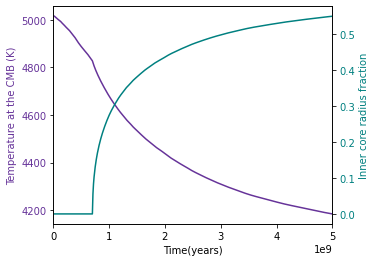

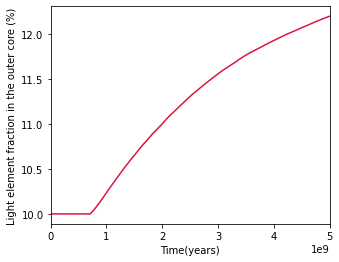

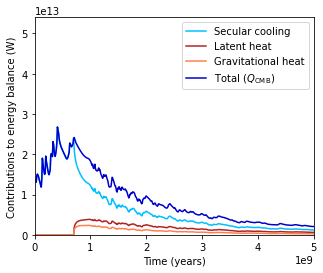

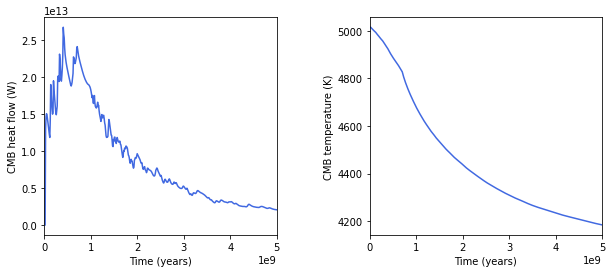

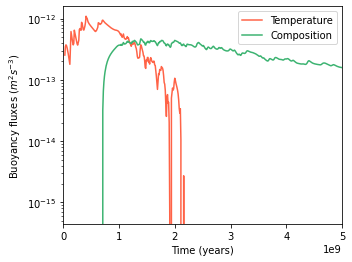

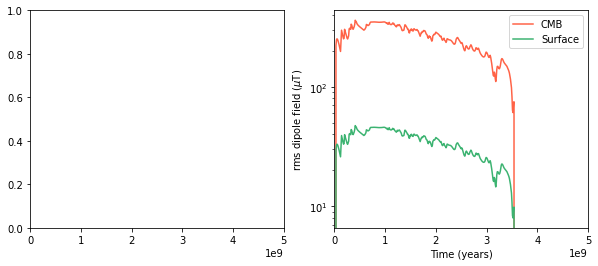

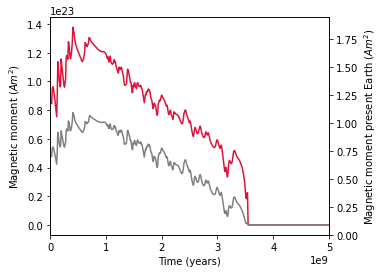

In [5]:
evo = evolution.Evolution(Planet)
evo.run()
evo.plot(plots_folder)

In [6]:
# print (evo.T_CMB[-1]) # Less light elements --> colder TCMB temperature, smaller adiabatic heat flow!
# print ((evo.r_IC[-1]/evo.planet.r_OC))
# print ((evo.r_IC[-1]/evo.planet.r_OC)**3)
print (evo.M)

[0.00000000e+00 8.47228111e+22 9.42955115e+22 9.63376103e+22
 9.53525608e+22 9.29474785e+22 8.98358873e+22 8.63621112e+22
 8.26984405e+22 7.89429834e+22 7.54478127e+22 9.11841606e+22
 1.13749293e+23 1.08566369e+23 1.03880014e+23 9.94986700e+22
 9.62721926e+22 9.79636188e+22 1.15712662e+23 1.11355149e+23
 1.07981595e+23 1.04335158e+23 1.00818178e+23 9.74995735e+22
 9.60334161e+22 9.91500549e+22 1.01975922e+23 1.16526200e+23
 1.18155627e+23 1.17255700e+23 1.15563652e+23 1.27693534e+23
 1.25825681e+23 1.20828322e+23 1.16589787e+23 1.15833118e+23
 1.18562320e+23 1.21998353e+23 1.27448650e+23 1.37820665e+23
 1.35406382e+23 1.34088834e+23 1.30246438e+23 1.27720978e+23
 1.26044113e+23 1.24692304e+23 1.23502077e+23 1.22414688e+23
 1.21384212e+23 1.20374110e+23 1.19372708e+23 1.18374354e+23
 1.17363108e+23 1.16322221e+23 1.15266442e+23 1.14334658e+23
 1.13855704e+23 1.14610864e+23 1.15810875e+23 1.17812258e+23
 1.19945110e+23 1.27070432e+23 1.26558500e+23 1.25498922e+23
 1.24337744e+23 1.248147

In [2]:
# If inner core, dT_dt should be smaller as we also have latent heat --> Lena is using a larger one, meaning that her interior is losing more heat
# than what it should be --> her Q_CMB should be lower.

# REVISION: Our T is larger than what Lena has --> this means we should be using a larger Q_CMB (Lena is using a smaller one)
# What happens if we add Q_ICB? T should be even larger!!

## QCMB evolution

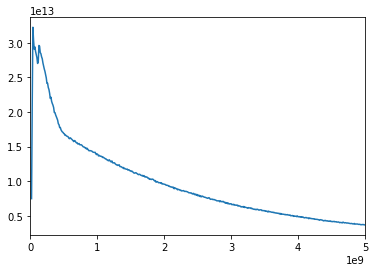

In [6]:
qcmb_ev = pd.read_csv("./Q_CMB/res_t_HS_Tm_Tb_qs_qc_M{:02d}_Fe{:02d}_#FeM{:02d}.res".format(int(10*Mp),int(XFe), int(FeM)), skipinitialspace=True, sep=" ", index_col=False,skiprows=[0])
qcmb_ev.columns = ["time", "H_rad", "T_um","T_cmb","q_surf","qcmb"]
time_vector = qcmb_ev["time"] *1e6
qcmb = qcmb_ev["qcmb"]

plt.plot(time_vector,qcmb*evo.planet.r_OC**2 * 4 * np.pi)
plt.xlim([0,5e9])
plt.show()

## Run cases for all Mp, all XFe, and a set amount of FeM (LE=0)

In [6]:
Masses = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,1.7,1.8,1.9, 2.]
Fe = [15,20,25,30,35,40,45,50,55,60,65,70,75,80]
Fe_mantle = [0.00,10.,20.]
S = 0.0

M, F = np.meshgrid(Masses, Fe)
r_IC_end = np.zeros((len(Fe),len(Masses)*len(Fe_mantle)))
r_IC_beginning = np.zeros_like(r_IC_end)
MF_lifetime = np.zeros_like(r_IC_end)
MF_strength = np.zeros_like(r_IC_end)
MF_surface = np.zeros_like(r_IC_end)
tIC_80 = np.zeros_like(r_IC_end)
r_OC = np.zeros_like(r_IC_end)

for m,iron_mantle in enumerate(Fe_mantle):
    for i, mass in enumerate(Masses):
        for j,iron in enumerate(Fe):
            Mp = mass
            XFe = iron
            FeM = iron_mantle
            S = S
            print (Mp,XFe,FeM,S)
            Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
            evo = evolution.Evolution(Planet)

            evo.run()
            
            r_IC_beginning[j,i+m*len(Masses)] = evo.planet.r_IC_0/1e3 
            r_IC_end[j,i+m*len(Masses)] = evo.r_IC[-1]/1e3      
            r_OC[j,i+m*len(Masses)] = evo.planet.r_OC/1e3
            MF_lifetime[j,i+m*len(Masses)] = evo.t_mf
            tIC_80[j,i+m*len(Masses)] = evo.t_80/1e9
            MF_strength[j,i+m*len(Masses)] = np.max(evo.M_ratio)
            MF_surface[j,i+m*len(Masses)] = np.max(evo.Bs*1e6)

0.8 15 0.0 0.0
The magnetic field lifetime is 1.7400010 billion years.
0.8 20 0.0 0.0
The magnetic field lifetime is 1.9400070 billion years.
0.8 25 0.0 0.0
The magnetic field lifetime is 2.2400010 billion years.
0.8 30 0.0 0.0
The magnetic field lifetime is 2.2700140 billion years.
0.8 35 0.0 0.0
The magnetic field lifetime is 2.3400020 billion years.
0.8 40 0.0 0.0
The magnetic field lifetime is 2.4100050 billion years.
0.8 45 0.0 0.0
The magnetic field lifetime is 2.4800020 billion years.
0.8 50 0.0 0.0
The magnetic field lifetime is 2.6300180 billion years.
0.8 55 0.0 0.0
The magnetic field lifetime is 2.6900130 billion years.
0.8 60 0.0 0.0
The magnetic field lifetime is 2.8200170 billion years.
0.8 65 0.0 0.0
The magnetic field lifetime is 2.5800023 billion years.
0.8 70 0.0 0.0
The magnetic field lifetime is 2.2200019 billion years.
0.8 75 0.0 0.0
The magnetic field lifetime is 1.8600008 billion years.
0.8 80 0.0 0.0
The magnetic field lifetime is 0.8500042 billion years.
0.9 15

The magnetic field lifetime is 3.1900040 billion years.
1.6 40 0.0 0.0
The magnetic field lifetime is 3.3400100 billion years.
1.6 45 0.0 0.0
The magnetic field lifetime is 3.1800050 billion years.
1.6 50 0.0 0.0
The magnetic field lifetime is 3.4900080 billion years.
1.6 55 0.0 0.0
The magnetic field lifetime is 3.6400130 billion years.
1.6 60 0.0 0.0
The magnetic field lifetime is 3.9000170 billion years.
1.6 65 0.0 0.0
The magnetic field lifetime is 3.1400000 billion years.
1.6 70 0.0 0.0
The magnetic field lifetime is 1.8900010 billion years.
1.6 75 0.0 0.0
The magnetic field lifetime is 1.5400030 billion years.
1.6 80 0.0 0.0
The magnetic field lifetime is 1.2900020 billion years.
1.7 15 0.0 0.0
The magnetic field lifetime is 2.8400110 billion years.
1.7 20 0.0 0.0
The magnetic field lifetime is 2.8600180 billion years.
1.7 25 0.0 0.0
The magnetic field lifetime is 2.9900180 billion years.
1.7 30 0.0 0.0
The magnetic field lifetime is 3.0100030 billion years.
1.7 35 0.0 0.0
The ma

The magnetic field lifetime is 1.8600080 billion years.
1.1 55 10.0 0.0
The magnetic field lifetime is 1.4100030 billion years.
1.1 60 10.0 0.0
The magnetic field lifetime is 0.9600017 billion years.
1.1 65 10.0 0.0
The magnetic field lifetime is 0.8500051 billion years.
1.1 70 10.0 0.0
The magnetic field lifetime is 0.7399991 billion years.
1.1 75 10.0 0.0
The magnetic field lifetime is 0.6999936 billion years.
1.1 80 10.0 0.0
The magnetic field lifetime is 0.6299990 billion years.
1.2 15 10.0 0.0
The magnetic field lifetime is 2.4900340 billion years.
1.2 20 10.0 0.0
The magnetic field lifetime is 2.4400100 billion years.
1.2 25 10.0 0.0
The magnetic field lifetime is 2.4200160 billion years.
1.2 30 10.0 0.0
The magnetic field lifetime is 2.4800230 billion years.
1.2 35 10.0 0.0
The magnetic field lifetime is 2.7900200 billion years.
1.2 40 10.0 0.0
The magnetic field lifetime is 2.6500130 billion years.
1.2 45 10.0 0.0
The magnetic field lifetime is 2.1900100 billion years.
1.2 50 1

The magnetic field lifetime is 1.1400010 billion years.
1.9 65 10.0 0.0
The magnetic field lifetime is 0.9900032 billion years.
1.9 70 10.0 0.0
The magnetic field lifetime is 0.8100022 billion years.
1.9 75 10.0 0.0
The magnetic field lifetime is 0.6400046 billion years.
1.9 80 10.0 0.0
The magnetic field lifetime is 0.4800053 billion years.
2.0 15 10.0 0.0
The magnetic field lifetime is 2.6200010 billion years.
2.0 20 10.0 0.0
The magnetic field lifetime is 2.4800140 billion years.
2.0 25 10.0 0.0
The magnetic field lifetime is 2.6400150 billion years.
2.0 30 10.0 0.0
The magnetic field lifetime is 2.7400060 billion years.
2.0 35 10.0 0.0
The magnetic field lifetime is 2.6800000 billion years.
2.0 40 10.0 0.0
The magnetic field lifetime is 2.0600130 billion years.
2.0 45 10.0 0.0
The magnetic field lifetime is 1.7400020 billion years.
2.0 50 10.0 0.0
The magnetic field lifetime is 1.4900040 billion years.
2.0 55 10.0 0.0
The magnetic field lifetime is 1.2700030 billion years.
2.0 60 1

The magnetic field lifetime is 0.1700225 billion years.
1.4 75 20.0 0.0
The magnetic field lifetime is 0.1800021 billion years.
1.4 80 20.0 0.0
The magnetic field lifetime is 0.1400408 billion years.
1.5 15 20.0 0.0
The magnetic field lifetime is 1.3300320 billion years.
1.5 20 20.0 0.0
The magnetic field lifetime is 1.3200170 billion years.
1.5 25 20.0 0.0
The magnetic field lifetime is 0.8200039 billion years.
1.5 30 20.0 0.0
The magnetic field lifetime is 0.6200310 billion years.
1.5 35 20.0 0.0
The magnetic field lifetime is 0.5200002 billion years.
1.5 40 20.0 0.0
The magnetic field lifetime is 0.4600105 billion years.
1.5 45 20.0 0.0
The magnetic field lifetime is 0.4100258 billion years.
1.5 50 20.0 0.0
The magnetic field lifetime is 0.3900166 billion years.
1.5 55 20.0 0.0
The magnetic field lifetime is 0.3700172 billion years.
1.5 60 20.0 0.0
The magnetic field lifetime is 0.3800134 billion years.
1.5 65 20.0 0.0
The magnetic field lifetime is 0.3200941 billion years.
1.5 70 2

## Plotting functions

In [7]:
# Only thermal dynamo
# 4.150 for 150 Wm-1K-1
# 3.190 for 250 Wm-1K-1
# 5 for 60 Wm-1K-1

# Thermal and chemical dynamo
# 4.150 for 150 Wm-1K-1
print (np.max(MF_lifetime))


4.150004


In [8]:
levels_rIC = np.linspace(0, 5500, 12)
levels_ICMF = np.linspace(0, 1, 11)
levels_MF = np.linspace(0, 5, 11)
levels_rIC08 = np.linspace(0,5,6)
levels_MFstr = np.linspace(0,9,10)
levels_MFsurf = np.linspace(0,700,8)
levels_MF = np.linspace(0, 5, 51)
levels_MFplot = np.linspace(0, 5, 11)
levels_MFsurf = list(map(int,np.linspace(0,740,38)))
levels_MFsurfplot = list(map(int, np.linspace(0,800,9)))
size = 13

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 11}

plt.rc('font', **font)

def plot_contourf(X,Y,arr,Masses,Fe,Fe_mantle,levels,levels_plot,plots_folder,colormap=plt.cm.magma,clabel="ICB radius (km)",figname="r_IC_FeM.pdf"):
    fig, ax = plt.subplots(1, len(Fe_mantle), figsize=[16,4],sharey=True,sharex=True)
    plt.subplots_adjust(wspace = 0.2)
    
    for i in range(len(Fe_mantle)):
        sc = ax[i].contourf(X,Y,arr[:,i*len(Masses):len(Masses)*(i+1)],levels, cmap = colormap) 
        sc2 = ax[i].contour(X,Y,arr[:,i*len(Masses):len(Masses)*(i+1)],levels_plot,colors=('white',),linestyles=('-',),linewidths=(1,))
        ax[i].clabel(sc2, fmt = '%2.1f', colors = 'white', fontsize=11)
        #for a in range(len(Masses)):
            #for b in range(len(Fe)):
                #ax[i].scatter(Masses[a],Fe[b],s=size,color='white',edgecolors='k')
        if i!=0:
            ax[i].set_ylabel("")
        else:
            ax[i].set_ylabel("Fe content (wt.%)")
        ax[i].set_title('#$Fe_M$={}'.format(Fe_mantle[i]*1e-2))
        ax[i].yaxis.set_ticks_position('both')
        ax[i].set_xlabel("Planetary mass ($M_{p}/M_{Earth}$)")
        ax[i].set_xlim([0.8,2.0])
        ax[i].set_ylim([15,80])
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
    cb = fig.colorbar(sc, cax=cbar_ax)
    cb.set_ticks(levels_plot)
    cb.set_ticklabels(levels_plot)
    cb.set_label(clabel)
    plt.savefig(plots_folder + figname, bbox_inches="tight")
    plt.show()
    
def plot_contourfM(X,Y,arr,Masses,Fe,yl,levels,plots_folder,Ylabel = "#$Fe_{M}$",clabel="ICB radius (km)",figname="r_IC_FeM.pdf"):
    fig, ax = plt.subplots(1, len(Masses), figsize=[16,3],sharey=True,sharex=True)
    plt.subplots_adjust(wspace = 0.2)

    levels_rIC = np.linspace(0, 5500, 12)
    for i in range(len(Masses)):
        sc = ax[i].contourf(X,Y,arr[:,i*len(Fe):len(Fe)*(i+1)],levels, cmap = plt.cm.magma)  
        for a in range(len(Fe)):
            for b in range(len(yl)):
                ax[i].scatter(Fe[a],yl[b],s=size,color='white',edgecolors='k')
        if i!=0:
            ax[i].set_ylabel("")
        else:
            ax[i].set_ylabel(Ylabel)
        ax[i].set_title("{:.1f}".format(Masses_[i]) + r" $M_{Earth}$")
        ax[i].yaxis.set_ticks_position('both')
        ax[i].set_xlabel("Fe content (wt.%)")
        ax[i].yaxis.set_ticks_position('both')
        ax[i].set_xlim([15,75])
        if Ylabel == "LE":
            ax[i].set_ylim([0,0.1])
        else:
            ax[i].set_ylim([0,20])
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
    cb = fig.colorbar(sc, cax=cbar_ax)
    cb.set_label(clabel)
    plt.savefig(plots_folder + figname, bbox_inches="tight")
    plt.show()

colors = ["coral","crimson","darkmagenta"]
#ls = ["-",":"]
ls = ["-","-"]
label_mass = ["1 $M_{Earth}$","1.5 $M_{Earth}$","2 $M_{Earth}$"]

def plot_evolution(nplot,Masses,Fe,arr,yl,figsize=[10,4],leg=(0.98, 0.98),yltop=[3,3],ylbot=[3,3],figname = "Evo_TICB_rICBFUNC.pdf"):
    fig, ax = plt.subplots(1, nplot,figsize=figsize,sharex=True)
    for b in range(nplot):
        for i, mass in enumerate(Masses):
            for j,iron in enumerate(Fe):
                if nplot ==1:
                    ax.plot(time[:,i+j*len(Masses)]/1e9,arr[:,i+j*len(Masses)],color=colors[j],linestyle=ls[j])
                    ax.set_ylabel(yl)
                    ax.set_xlabel('Time (Gyr)')
                    ax.set_xlim([0,5])
                    if j==0:
                        ax.plot(time[:,i+j*len(Masses)]/1e9,arr[:,i+j*len(Masses)],color=colors[j],linestyle=ls[j],label=label_mass[i])                   
                else:    
                    arr_plot = arr[b]
                    ax[b].plot(time[:,i+j*len(Masses)]/1e9,arr_plot[:,i+j*len(Masses)],color=colors[j],linestyle=ls[j])
                    ax[b].set_ylabel(yl[b])
                    ax[b].set_xlabel('Time (Gyr)')
                    ax[b].set_xlim([0,5])
                    ax[b].set_ylim(bottom=ylbot[b],top=yltop[b])
                    if j==0 and b==nplot-1:
                        arr_plot = arr[b]
                        ax[b].plot(time[:,i+j*len(Masses)]/1e9,arr_plot[:,i+j*len(Masses)],color=colors[j],linestyle=ls[j],label=label_mass[i])
                if yl == ["ICB temperature (K)","Inner core radius (km)"]:# and arr[1][0]==0.:
                    ax[1].scatter(t_IC0[i]/1e9,0,s=30,color='lightseagreen',marker='*')
                    ax[0].scatter(t_IC0[i]/1e9,T_IC0[i],s=30,color='lightseagreen',marker='*')
                if yl == ["CMB heat flow (TW)","CMB temperature (K)"] and Fe==[0,10]:
                    ax[1].scatter(t_IC0[i]/1e9,T_CMB0[i],s=30,color='lightseagreen',marker='*')
    display = (0,1,2,3,4)
    XFe_noic = plt.Line2D((0,1),(0,0), color='k')
    XFe_ic = plt.Line2D((0,1),(0,0), color='k',marker='',linestyle=':')
    if nplot>1:
        ax1 = ax[nplot-1]
        plt.subplots_adjust(wspace = 0.3)
    else:
        ax1 = plt.gca()
    #handles, labels = ax1.get_legend_handles_labels()
    #ax1.legend([handle for i,handle in enumerate(handles) if i in display]+[XFe_noic,XFe_ic],
    #    [label for i,label in enumerate(labels) if i in display]+['$X_{Fe}$=25','$X_{Fe}$=55'],bbox_to_anchor=leg,borderaxespad=0.,fontsize=8) 
    if yl=="Magnetic moment ($A m^{2}$)":
        ax2 = ax1.twinx()  
        ax2.set_ylabel('Magnetic moment present Earth ($A m^{2}$)')  
        ax2.set_ylim([0,3])
    plt.savefig(plots_folder + figname, bbox_inches="tight")
    plt.show() 

## Plots

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


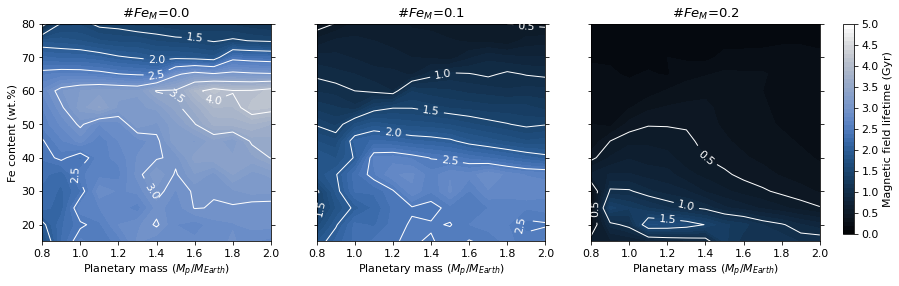

In [9]:
#plot_contourf(M,F,r_IC_beginning/r_OC,Masses,Fe,Fe_mantle,levels_ICMF,levels_ICMFplot,plots_folder,colormap=lajolla_r,clabel="$r_{IC_{0}}$/$r_{OC}$",figname="ICMF0_FeM.pdf")

#plot_contourf(M,F,r_IC_end/r_OC,Masses,Fe,Fe_mantle,levels_ICMF,levels_ICMFplot,plots_folder,colormap=lajolla_r,clabel="$r_{IC}$/$r_{OC}$",figname="ICMF_FeM.pdf")

# MF lifetime
plot_contourf(M,F,MF_lifetime,Masses,Fe,Fe_mantle,levels_MF,levels_MFplot,plots_folder,colormap=oslo,clabel="Magnetic field lifetime (Gyr)",figname="MF_lifetime_FeM.pdf")

# Dipole moment
#plot_contourf(M,F,MF_strength,Masses,Fe,Fe_mantle,levels_MFstr,plots_folder,colormap=oslo,clabel="Magnetic moment ($M_{m_{Earth}}$)",figname="MM.pdf")

# Surface strength
#plot_contourf(M,F,MF_surface,Masses,Fe,Fe_mantle,levels_MFsurf,levels_MFsurfplot,plots_folder,colormap=oslo,clabel="Surface MF intensity ($\mu T$)",figname="M_surf.pdf")

## Plot the two observables (planetary mass and radius) with corresponding MF lifetime

In [13]:
Masses = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,1.7,1.8,1.9, 2.]
Fe = [15,20,25,30,35,40,45,50,55,60,65,70,75,80]
Fe_mantle = [10.]
S = 0.0

M, F = np.meshgrid(Masses, Fe)
r_IC_end = np.zeros((len(Fe),len(Masses)*len(Fe_mantle)))
MF_lifetime = np.zeros_like(r_IC_end)
r_OC = np.zeros_like(r_IC_end)
r_planet = np.zeros_like(r_IC_end)
MP = np.zeros_like(r_IC_end)

for m,iron_mantle in enumerate(Fe_mantle):
    for i, mass in enumerate(Masses):
        for j,iron in enumerate(Fe):
            Mp = mass
            XFe = iron
            FeM = iron_mantle
            S = S
            print (Mp,XFe,FeM,S)
            Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
            evo = evolution.Evolution(Planet)

            evo.run()
            
            r_OC[j,i+m*len(Masses)] = evo.planet.r_OC
            MF_lifetime[j,i+m*len(Masses)] = evo.t_mf
            r_planet[j,i+m*len(Masses)] = evo.planet.r_planet
            MP[j,i+m*len(Masses)] = evo.planet.Mp


0.8 15 10.0 0.0
The magnetic field lifetime is 1.8800190 billion years.
0.8 20 10.0 0.0
The magnetic field lifetime is 1.6400330 billion years.
0.8 25 10.0 0.0
The magnetic field lifetime is 1.4200240 billion years.
0.8 30 10.0 0.0
The magnetic field lifetime is 1.4500090 billion years.
0.8 35 10.0 0.0
The magnetic field lifetime is 1.8400070 billion years.
0.8 40 10.0 0.0
The magnetic field lifetime is 1.9000120 billion years.
0.8 45 10.0 0.0
The magnetic field lifetime is 1.7000080 billion years.
0.8 50 10.0 0.0
The magnetic field lifetime is 1.4800020 billion years.
0.8 55 10.0 0.0
The magnetic field lifetime is 1.2600100 billion years.
0.8 60 10.0 0.0
The magnetic field lifetime is 1.0899983 billion years.
0.8 65 10.0 0.0
The magnetic field lifetime is 0.9700011 billion years.
0.8 70 10.0 0.0
The magnetic field lifetime is 0.8499969 billion years.
0.8 75 10.0 0.0
The magnetic field lifetime is 0.6300070 billion years.
0.8 80 10.0 0.0
The magnetic field lifetime is 0.4199954 billion

The magnetic field lifetime is 2.5200180 billion years.
1.6 30 10.0 0.0
The magnetic field lifetime is 2.5900100 billion years.
1.6 35 10.0 0.0
The magnetic field lifetime is 2.7400150 billion years.
1.6 40 10.0 0.0
The magnetic field lifetime is 2.3700160 billion years.
1.6 45 10.0 0.0
The magnetic field lifetime is 1.9200010 billion years.
1.6 50 10.0 0.0
The magnetic field lifetime is 1.6200090 billion years.
1.6 55 10.0 0.0
The magnetic field lifetime is 1.3700030 billion years.
1.6 60 10.0 0.0
The magnetic field lifetime is 1.1700070 billion years.
1.6 65 10.0 0.0
The magnetic field lifetime is 1.0100040 billion years.
1.6 70 10.0 0.0
The magnetic field lifetime is 0.7800077 billion years.
1.6 75 10.0 0.0
The magnetic field lifetime is 0.5800017 billion years.
1.6 80 10.0 0.0
The magnetic field lifetime is 0.5099970 billion years.
1.7 15 10.0 0.0
The magnetic field lifetime is 2.5400500 billion years.
1.7 20 10.0 0.0
The magnetic field lifetime is 2.6400200 billion years.
1.7 25 1

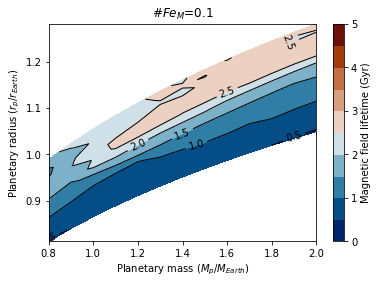

In [15]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 11}

levels_obs = np.linspace(0,5,11)
#levels_obs = np.linspace(1,5,9)
sc = plt.contourf(MP,r_planet/6371e3,MF_lifetime,edgecolor='black',levels=levels_obs,cmap=vik)#'RdYlBu_r')
sc2 = plt.contour(MP,r_planet/6371e3,MF_lifetime,levels=levels_obs,colors=('black',),linestyles=('-',),linewidths=(1,))
plt.clabel(sc2, fmt = '%2.1f', colors = 'black', fontsize=10)
#plt.scatter(MP,r_planet/6371e3,MF_lifetime,edgecolor='black')
cb = plt.colorbar(sc)
cb.set_label('Magnetic field lifetime (Gyr)')
plt.xlabel('Planetary mass ($M_{p}/M_{Earth}$)')
plt.ylabel('Planetary radius ($r_{p}/r_{Earth}$)')
plt.title('#$Fe_{M}$=0.1')
plt.savefig(plots_folder+'Obs.pdf')
plt.show()

## Plot time needed to reach 70% of the outer core size

In [4]:
Masses = [1.,2.]
Fe_mantle = [0.]
Fe = [15,20,25,30,35,40,45,50,55,60,65,70,75,80]
S = 0.0

M, F = np.meshgrid(Masses, Fe)
r_IC_end = np.zeros((len(Fe),len(Masses)*len(Fe_mantle)))
tIC_80_0 = np.zeros_like(r_IC_end)
r_OC = np.zeros_like(r_IC_end)

for m,iron_mantle in enumerate(Fe_mantle):
    for i, mass in enumerate(Masses):
        for j,iron in enumerate(Fe):
            Mp = mass
            XFe = iron
            FeM = iron_mantle
            S = S
            print (Mp,XFe,FeM,S)
            Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
            evo = evolution.Evolution(Planet)

            evo.run()
            
            tIC_80_0[j,i+m*len(Masses)] = evo.t_80/1e9
            if evo.t_80/1e9<0.04:
                tIC_80_0[j,i+m*len(Masses)]=0.
            if evo.t_80==0.:
                tIC_80_0[j,i+m*len(Masses)]=6.
            print (tIC_80_0[j,i+m*len(Masses)])

Fe_mantle = [10.]
tIC_80_10 = np.zeros_like(r_IC_end)

for m,iron_mantle in enumerate(Fe_mantle):
    for i, mass in enumerate(Masses):
        for j,iron in enumerate(Fe):
            Mp = mass
            XFe = iron
            FeM = iron_mantle
            S = S
            print (Mp,XFe,FeM,S)
            Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
            evo = evolution.Evolution(Planet)

            evo.run()
            
            tIC_80_10[j,i+m*len(Masses)] = evo.t_80/1e9
            if evo.t_80/1e9<0.04:
                tIC_80_10[j,i+m*len(Masses)] =0.
            if evo.t_80==0.:
                tIC_80_10[j,i+m*len(Masses)]=6.

Fe_mantle = [20.]
tIC_80_20 = np.zeros_like(r_IC_end)

for m,iron_mantle in enumerate(Fe_mantle):
    for i, mass in enumerate(Masses):
        for j,iron in enumerate(Fe):
            Mp = mass
            XFe = iron
            FeM = iron_mantle
            S = S
            print (Mp,XFe,FeM,S)
            Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
            evo = evolution.Evolution(Planet)

            evo.run()
            
            tIC_80_20[j,i+m*len(Masses)] = evo.t_80/1e9
            if evo.t_80/1e9<0.04:
                tIC_80_20[j,i+m*len(Masses)] =0.

1.0 15 0.0 0.0
The magnetic field lifetime is 2.6300040 billion years.
6.0
1.0 20 0.0 0.0
The magnetic field lifetime is 2.4600130 billion years.
6.0
1.0 25 0.0 0.0
The magnetic field lifetime is 2.6800210 billion years.
6.0
1.0 30 0.0 0.0
The magnetic field lifetime is 2.3900160 billion years.
6.0
1.0 35 0.0 0.0
The magnetic field lifetime is 2.5800160 billion years.
4.700025
1.0 40 0.0 0.0
The magnetic field lifetime is 2.3700150 billion years.
3.6800040000000003
1.0 45 0.0 0.0
The magnetic field lifetime is 2.8400200 billion years.
1.540003
1.0 50 0.0 0.0
The magnetic field lifetime is 3.0400000 billion years.
0.910007
1.0 55 0.0 0.0
The magnetic field lifetime is 3.2500020 billion years.
0.4200061
1.0 60 0.0 0.0
The magnetic field lifetime is 3.2000030 billion years.
0.060023219999999995
1.0 65 0.0 0.0
The magnetic field lifetime is 2.6200040 billion years.
0.0
1.0 70 0.0 0.0
The magnetic field lifetime is 2.1700090 billion years.
0.0
1.0 75 0.0 0.0
The magnetic field lifetime is 1

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


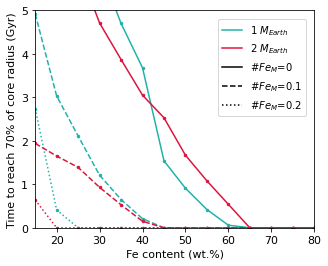

In [5]:
labels = ["1 $M_{Earth}$","2 $M_{Earth}$"]
colors = ["lightseagreen","crimson"]
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 11}

plt.rc('font', **font)
plt.figure(figsize=[5,4])
for i in range(len(Masses)):
    plt.plot(F[:,i],tIC_80_0[:,i],label=labels[i],color=colors[i],linestyle='-')
    plt.scatter(F[:,i],tIC_80_0[:,i],color=colors[i],s=6)
    plt.plot(F[:,i],tIC_80_10[:,i],color=colors[i],linestyle='--')
    plt.scatter(F[:,i],tIC_80_10[:,i],color=colors[i],s=6)
    plt.plot(F[:,i],tIC_80_20[:,i],color=colors[i],linestyle=':')
    plt.scatter(F[:,i],tIC_80_20[:,i],color=colors[i],s=6)
plt.legend()
plt.xlabel('Fe content (wt.%)')
plt.ylabel('Time to reach 70% of core radius (Gyr)')
plt.xlim([15,80])
plt.ylim([0.,5.])
ax = plt.gca()
display = (0,1,2,3,4)
FeM_0 = plt.Line2D((0,1),(0,0), color='k')
FeM_10 = plt.Line2D((0,1),(0,0), color='k',marker='',linestyle='--')
FeM_20 = plt.Line2D((0,1),(0,0), color='k',marker='',linestyle=':')
handles, labels = ax.get_legend_handles_labels()
ax.legend([handle for i,handle in enumerate(handles) if i in display]+[FeM_0,FeM_10,FeM_20],
[label for i,label in enumerate(labels) if i in display]+['#$Fe_{M}$=0','#$Fe_{M}$=0.1', '#$Fe_{M}$=0.2' ],bbox_to_anchor=(0.97,0.96),borderaxespad=0.,fontsize=10)
plt.savefig(plots_folder+"70%core.pdf")
plt.show()

## Evolutions for planets of different mass and FeM (FeM=0 and FeM=10)

In [20]:
# colors = ["coral","crimson","darkmagenta"]
colors = ["lightseagreen","crimson"]
ls = ["-",":"]
label_mass = ["1 $M_{Earth}$","2 $M_{Earth}$"]

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 11}

plt.rc('font', **font)

def plot_evolution(nplot,Masses,Fe,arr,yl,leg,figsize=[10,4],figname = "example.pdf"):
    fig, ax = plt.subplots(1, nplot,figsize=figsize,sharex=True)
    for b in range(nplot):
        for i, mass in enumerate(Masses):
            for j,iron in enumerate(Fe):
                if nplot ==1:
                    ax.plot(time[1:,i+j*len(Masses)]/1e9,arr[1:,i+j*len(Masses)],color=colors[i],linestyle=ls[j])
                    ax.set_ylabel(yl)
                    ax.set_xlabel('Time (Gyr)')
                    ax.set_xlim([0,5])
                    if j==0:
                        ax.plot(time[1:,i+j*len(Masses)]/1e9,arr[1:,i+j*len(Masses)],color=colors[i],linestyle=ls[j],label=label_mass[i])                   
                else:    
                    arr_plot = arr[b]
                    ax[b].plot(time[1:,i+j*len(Masses)]/1e9,arr_plot[1:,i+j*len(Masses)],color=colors[i],linestyle=ls[j])
                    ax[b].set_ylabel(yl[b])
                    ax[b].set_xlabel('Time (Gyr)')
                    ax[b].set_xlim([0,5])
                    if j==0 and b==nplot-1:
                        arr_plot = arr[b]
                        ax[b].plot(time[1:,i+j*len(Masses)]/1e9,arr_plot[1:,i+j*len(Masses)],color=colors[i],linestyle=ls[j],label=label_mass[i])
                if yl == ["Inner core radius fraction (%)","CMB temperature (K)","Fraction of light elements in the OC (%)"]:
                    ax[0].set_ylim(0,100)
                    ax[0].scatter(t_IC0[i]/1e9,0,s=30,color=colors[i],marker='*')
                    #ax[0].scatter(t_IC0[i]/1e9,T_IC0[i],s=30,color=colors[i],marker='*')
                    ax[1].scatter(t_IC0[i]/1e9,T_CMB0[i],s=30,color=colors[i],marker='*')
                if yl == ["CMB heat flow (W)","Secular cooling (W)","Latent + Gravitational heat (W)"]:
                    ax[b].set_ylim([0,1.5e14])
    #display = (0,1,2,3,4)
    #XFe_noic = plt.Line2D((0,1),(0,0), color='k')
    #XFe_ic = plt.Line2D((0,1),(0,0), color='k',marker='',linestyle=':')
    if nplot>1:
        ax1 = ax[nplot-1]
        plt.subplots_adjust(wspace = 0.3)
    else:
        ax1 = plt.gca()
    #handles, labels = ax1.get_legend_handles_labels()
    #ax1.legend([handle for i,handle in enumerate(handles) if i in display]+[XFe_noic,XFe_ic],
        #[label for i,label in enumerate(labels) if i in display]+['$X_{Fe}$=30 wt%','$X_{Fe}$=60 wt%'],bbox_to_anchor=leg,borderaxespad=0.,fontsize=10) 
    if yl=="Magnetic moment ($A m^{2}$)":
        ratio = arr/7.8e22
        ax2 = ax1.twinx() 
        ax2.set_ylabel('Magnetic moment present Earth ($A m^{2}$)')  
        ax2.set_ylim([0,np.max(ratio)*1.1])
    plt.savefig(plots_folder + figname, bbox_inches="tight")
    plt.show() 

2380010000.0 0
The magnetic field lifetime is 2.3800100 billion years.
2950014000.0 0
The magnetic field lifetime is 2.9500140 billion years.
3120008000.0 0
The magnetic field lifetime is 3.1200080 billion years.


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


3720006000.0 0
The magnetic field lifetime is 3.7200060 billion years.


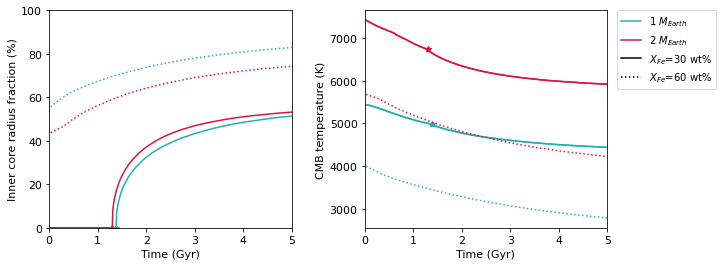

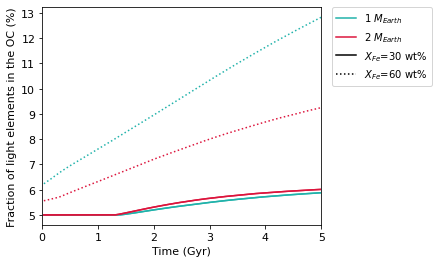

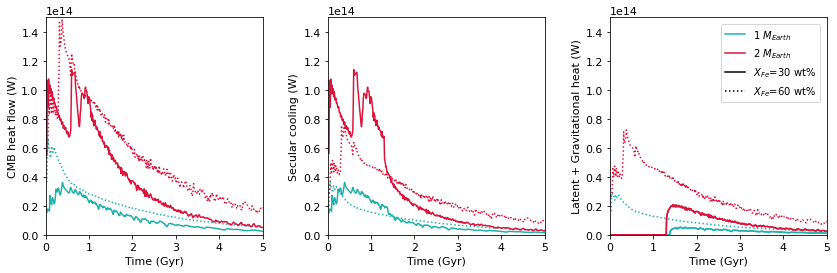

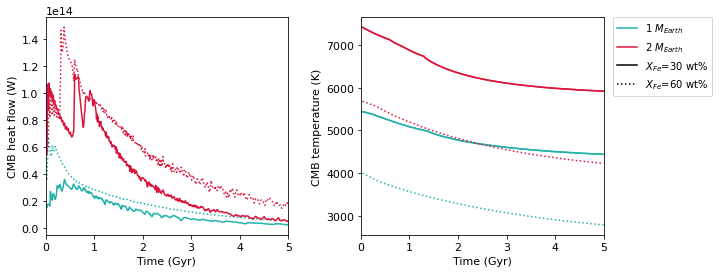

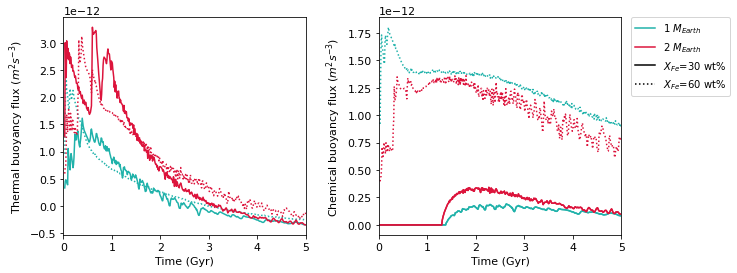

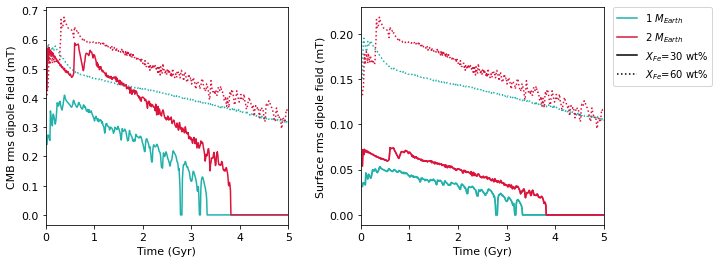

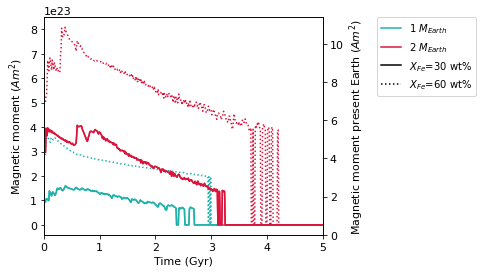

In [7]:
Masses = [1.,2.]
Fe = [30.,60.]
Fe_mantle = 0.
S=0.05

T_ICB = np.zeros((499,len(Fe)*len(Masses)),dtype=np.float64)
time = np.zeros_like(T_ICB)
r_ICB = np.zeros_like(T_ICB)
QC = np.zeros_like(T_ICB)
QL = np.zeros_like(T_ICB)
QX = np.zeros_like(T_ICB)
Q_comb = np.zeros_like(T_ICB)
Q_CMB = np.zeros_like(T_ICB)
T_CMB = np.zeros_like(T_ICB)
F_th = np.zeros_like(T_ICB)
F_X = np.zeros_like(T_ICB)
Bc = np.zeros_like(T_ICB)
Bs = np.zeros_like(T_ICB)
M = np.zeros_like(T_ICB)
M_ratio = np.zeros_like(T_ICB)
S_t = np.zeros_like(T_ICB)
t_IC0 = np.zeros((len(Fe)*len(Masses),1),dtype=np.float64)
T_IC0 = np.zeros_like(t_IC0)
T_CMB0 = np.zeros_like(t_IC0)

for i, mass in enumerate(Masses):
    for j,iron in enumerate(Fe):
        Mp = mass
        XFe = iron
        FeM = Fe_mantle
        
        Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
        evo = evolution.Evolution(Planet)
        evo.run()
            
        T_ICB[:,i+j*len(Masses)] = evo.T
        r_ICB[:,i+j*len(Masses)] = (evo.r_IC/evo.planet.r_OC)*100.
        QC[:,i+j*len(Masses)] = evo.QC
        QL[:,i+j*len(Masses)] = evo.QL
        QX[:,i+j*len(Masses)] = evo.QX
        Q_comb[:,i+j*len(Masses)] = QL[:,i+j*len(Masses)] + QX[:,i+j*len(Masses)]
        Q_CMB[:,i+j*len(Masses)] = evo.Q_CMB
        T_CMB[:,i+j*len(Masses)] = evo.T_CMB
        F_th[:,i+j*len(Masses)] = evo.F_th
        F_X[:,i+j*len(Masses)] = evo.F_X
        Bc[:,i+j*len(Masses)] = evo.Bc
        Bs[:,i+j*len(Masses)] = evo.Bs
        M[:,i+j*len(Masses)] = evo.M
        M_ratio[:,i+j*len(Masses)] = evo.M_ratio
        S_t[:,i+j*len(Masses)] = evo.S_t
        if r_ICB[0,i+j*len(Masses)] ==0:
            t_IC0[i] = evo.t_IC0
            T_IC0[i] = evo.T_IC0
            T_CMB0[i]=evo.T_CMB0
        time[:,i+j*len(Masses)] = evo.planet.time_vector

# Plot r_ICB and T_ICB
yl = ["Inner core radius fraction (%)","CMB temperature (K)",]
arr = [r_ICB,T_CMB]
plot_evolution(2,Masses,Fe,arr,yl,leg=(1.45,1.0),figsize=[10,4],figname = "Evo_rIC.pdf")

# Plot evolution of light elements
if S!=0.:
    plot_evolution(1,Masses,Fe,S_t*1e2,yl="Fraction of light elements in the OC (%)",leg=(1.04, 1.),figsize=[5,4],figname = "Evo_LE.pdf")

# Plot energy budgets
yl = ["CMB heat flow (W)","Secular cooling (W)","Latent + Gravitational heat (W)"]
arr = [Q_CMB,QC,Q_comb]
plot_evolution(3,Masses,Fe,arr,yl,leg=(0.97, 0.97),figsize=[14,4],figname = "Evo_Energies.pdf")

# T_CMB and Q_CMB
yl = ["CMB heat flow (W)","CMB temperature (K)"]
arr = [Q_CMB,T_CMB]
plot_evolution(2,Masses,Fe,arr,yl,leg=(1.04, 1.),figsize=[10,4],figname = "Evo_QCMB_TCMB.pdf")

# Plot buoyancy fluxes
yl = ["Thermal buoyancy flux ($m^{2}s^{-3}$)","Chemical buoyancy flux ($m^{2}s^{-3}$)"]
arr = [F_th,F_X]
plot_evolution(2,Masses,Fe,arr,yl,leg=(1.45, 1.),figsize=[10,4],figname = "Evo_buoyancy.pdf")

# Plot rms dipole field at the surface and at the CMB
yl = ["CMB rms dipole field (mT)","Surface rms dipole field (mT)"]
arr = [Bc*1e3,Bs*1e3]
plot_evolution(2,Masses,Fe,arr,yl,leg=(1.04, 1.),figsize=[10,4],figname = "Evo_rms.pdf")

# Plot magnetic moment evolution
plot_evolution(1,Masses,Fe,M,yl="Magnetic moment ($A m^{2}$)",leg=(1.55, 1.),figsize=[5,4],figname = "Evo_MF.pdf")

## One plot

In [21]:
Masses = [1.,2.]
Fe = [30.,60.]
Fe_mantle = 0.
S=0.05

T_ICB = np.zeros((499,len(Fe)*len(Masses)),dtype=np.float64)
time = np.zeros_like(T_ICB)
r_ICB = np.zeros_like(T_ICB)
QC = np.zeros_like(T_ICB)
QL = np.zeros_like(T_ICB)
QX = np.zeros_like(T_ICB)
Q_comb = np.zeros_like(T_ICB)
Q_CMB = np.zeros_like(T_ICB)
T_CMB = np.zeros_like(T_ICB)
F_th = np.zeros_like(T_ICB)
F_X = np.zeros_like(T_ICB)
Bc = np.zeros_like(T_ICB)
Bs = np.zeros_like(T_ICB)
M = np.zeros_like(T_ICB)
M_ratio = np.zeros_like(T_ICB)
S_t = np.zeros_like(T_ICB)
t_IC0 = np.zeros((len(Fe)*len(Masses),1),dtype=np.float64)
T_IC0 = np.zeros_like(t_IC0)
T_CMB0 = np.zeros_like(t_IC0)

for i, mass in enumerate(Masses):
    for j,iron in enumerate(Fe):
        Mp = mass
        XFe = iron
        FeM = Fe_mantle
        
        Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
        evo = evolution.Evolution(Planet)
        evo.run()
            
        T_ICB[:,i+j*len(Masses)] = evo.T
        r_ICB[:,i+j*len(Masses)] = (evo.r_IC/evo.planet.r_OC)*100.
        QC[:,i+j*len(Masses)] = evo.QC
        QL[:,i+j*len(Masses)] = evo.QL
        QX[:,i+j*len(Masses)] = evo.QX
        Q_comb[:,i+j*len(Masses)] = QL[:,i+j*len(Masses)] + QX[:,i+j*len(Masses)]
        Q_CMB[:,i+j*len(Masses)] = evo.Q_CMB
        T_CMB[:,i+j*len(Masses)] = evo.T_CMB
        F_th[:,i+j*len(Masses)] = evo.F_th
        F_X[:,i+j*len(Masses)] = evo.F_X
        Bc[:,i+j*len(Masses)] = evo.Bc
        Bs[:,i+j*len(Masses)] = evo.Bs
        M[:,i+j*len(Masses)] = evo.M
        M_ratio[:,i+j*len(Masses)] = evo.M_ratio
        S_t[:,i+j*len(Masses)] = evo.S_t
        if r_ICB[0,i+j*len(Masses)] ==0:
            t_IC0[i] = evo.t_IC0
            T_IC0[i] = evo.T_IC0
            T_CMB0[i]=evo.T_CMB0
        time[:,i+j*len(Masses)] = evo.planet.time_vector

The magnetic field lifetime is 2.7800040 billion years.
The magnetic field lifetime is 5.0000000 billion years.
The magnetic field lifetime is 3.8200280 billion years.
The magnetic field lifetime is 5.0000000 billion years.


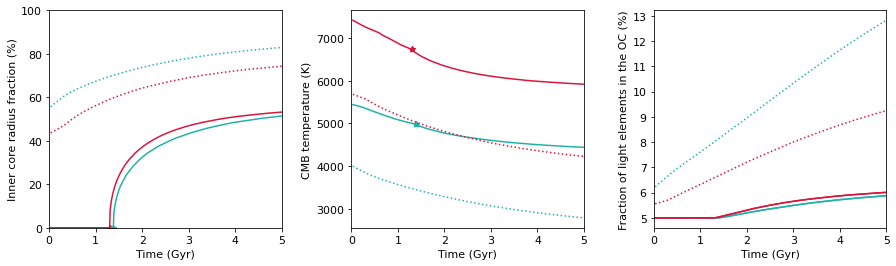

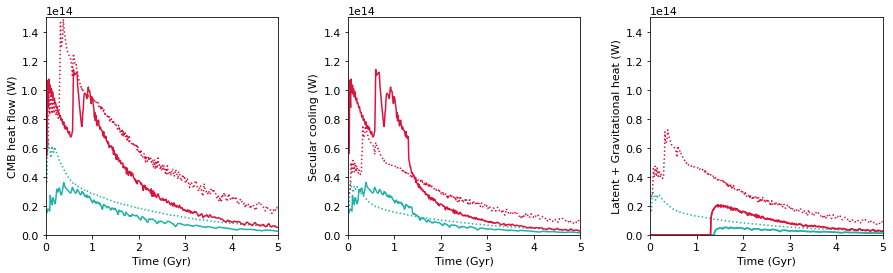

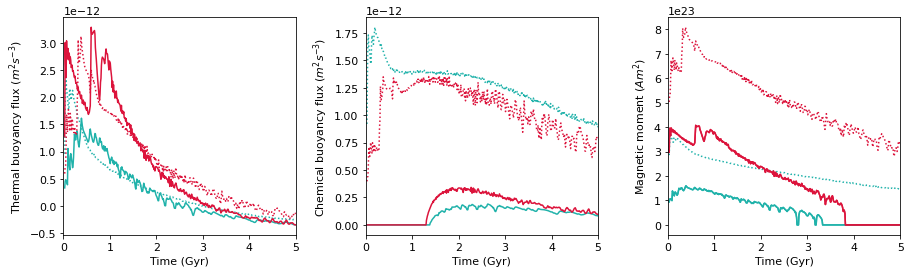

In [22]:
# Plot r_ICB and T_ICB
yl = ["Inner core radius fraction (%)","CMB temperature (K)","Fraction of light elements in the OC (%)"]
arr = [r_ICB,T_CMB,S_t*1e2]
plot_evolution(3,Masses,Fe,arr,yl,leg=(1.45,1.0),figsize=[15,4],figname = "Evo_rIC.pdf")

# Plot energy budgets
yl = ["CMB heat flow (W)","Secular cooling (W)","Latent + Gravitational heat (W)"]
arr = [Q_CMB,QC,Q_comb]
plot_evolution(3,Masses,Fe,arr,yl,leg=(0.97, 0.97),figsize=[15,4],figname = "Evo_Energies.pdf")

# Plot buoyancy fluxes
yl = ["Thermal buoyancy flux ($m^{2}s^{-3}$)","Chemical buoyancy flux ($m^{2}s^{-3}$)","Magnetic moment ($A m^{2}$)"]
arr = [F_th,F_X,M]
plot_evolution(3,Masses,Fe,arr,yl,leg=(1.45, 1.),figsize=[15,4],figname = "Evo_buoyancy.pdf")

In [11]:
Masses = [1.]
Fe = [25.,50.]
Fe_mantle = 0.
S=0.

T_ICB = np.zeros((499,len(Fe)*len(Masses)),dtype=np.float64)
time = np.zeros_like(T_ICB)
r_ICB = np.zeros_like(T_ICB)
QC = np.zeros_like(T_ICB)
QL = np.zeros_like(T_ICB)
QX = np.zeros_like(T_ICB)
Q_CMB = np.zeros_like(T_ICB)
T_CMB = np.zeros_like(T_ICB)
F_th = np.zeros_like(T_ICB)
F_X = np.zeros_like(T_ICB)
Bc = np.zeros_like(T_ICB)
Bs = np.zeros_like(T_ICB)
M = np.zeros_like(T_ICB)
M_ratio = np.zeros_like(T_ICB)
S_t = np.zeros_like(T_ICB)
t_IC0 = np.zeros((len(Fe)*len(Masses),1),dtype=np.float64)
T_IC0 = np.zeros_like(t_IC0)
T_CMB0 = np.zeros_like(t_IC0)

for i, mass in enumerate(Masses):
    for j,iron in enumerate(Fe):
        Mp = mass
        FeM = Fe_mantle
        XFe = iron
        S=0.
        
        Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
        evo = evolution.Evolution(Planet)
        evo.run()
            
        T_ICB[:,i+j*len(Masses)] = evo.T
        r_ICB[:,i+j*len(Masses)] = evo.r_IC
        QC[:,i+j*len(Masses)] = evo.QC
        QL[:,i+j*len(Masses)] = evo.QL
        QX[:,i+j*len(Masses)] = evo.QX
        Q_CMB[:,i+j*len(Masses)] = evo.Q_CMB
        T_CMB[:,i+j*len(Masses)] = evo.T_CMB
        F_th[:,i+j*len(Masses)] = evo.F_th
        F_X[:,i+j*len(Masses)] = evo.F_X
        Bc[:,i+j*len(Masses)] = evo.Bc
        Bs[:,i+j*len(Masses)] = evo.Bs
        M[:,i+j*len(Masses)] = evo.M
        M_ratio[:,i+j*len(Masses)] = evo.M_ratio
        S_t[:,i+j*len(Masses)] = evo.S_t
        if r_ICB[0,i+j*len(Masses)] == 0:
            t_IC0[i] = evo.t_IC0
            T_IC0[i] = evo.T_IC0
            T_CMB0[i] = evo.T_CMB0
        time[:,i+j*len(Masses)] = evo.planet.time_vector

colors = ["lightseagreen","crimson"]
# Plot r_ICB and T_ICB
yl = ["ICB temperature (K)","Inner core radius (km)"]
arr = [T_ICB,r_ICB/1e3]
plot_evolution(2,Masses,Fe,arr,yl,figsize=[10,4],leg=(1.04, 1.),yltop=[10400,4600],ylbot=[3500,-100],figname = "Evo_rIC.pdf")

# Plot evolution of light elements
if S!=0.:
    plot_evolution(1,Masses,Fe,S_t*1e2,yl="Fraction of light elements (%)",figsize=[5,4],leg=(1.04, 1.),yltop=[100],ylbot=[0],figname = "Evo_LE.pdf")

# Plot energy budgets
yl = ["Secular cooling (TW)","Latent + Gravitational heat (TW)"]
arr = [QC/1e12,QL/1e12+QX/1e12]
plot_evolution(2,Masses,Fe,arr,yl,figsize=[10,4],yltop=[40,40],ylbot=[0,0],leg = (1.35, 1.),figname = "Evo_Energy.pdf")

# T_CMB and Q_CMB
yl = ["CMB heat flow (TW)","CMB temperature (K)"]
arr = [Q_CMB/1e12,T_CMB]
plot_evolution(2,Masses,Fe,arr,yl,figsize=[10,4],yltop=[40,8000],ylbot=[0,2000],leg = (1.32, 1.),figname = "Evo_CMB.pdf")

# Plot buoyancy fluxes
yl = ["Thermal buoyancy flux ($m^{2}s^{-3}$)","Compositional buoyancy flux ($m^{2}s^{-3}$)"]
arr = [F_th,F_X]
plot_evolution(2,Masses,Fe,arr,yl,figsize=[10,4],yltop=[3e-12,6.5e-13],ylbot=[0,0],leg = (1.32, 1.),figname = "Evo_Fluxes.pdf")

# Plot rms dipole field at the surface and at the CMB
yl = ["CMB rms dipole field (mT)","Surface rms dipole field (mT)"]
arr = [Bc*1e3,Bs*1e3]
plot_evolution(2,Masses,Fe,arr,yl,figsize=[10,4],yltop=[0.7,0.2],ylbot=[0,0],leg = (1.32, 1.),figname = "Evo_rms.pdf")

# Plot magnetic moment evolution
plot_evolution(1,Masses,Fe,M,yl="Magnetic moment ($A m^{2}$)",figsize=[5,4],yltop=[6.6e23],ylbot=[0],leg=(0.98, 0.98),figname = "Evo_MF.pdf")

The magnetic field lifetime is 2.68 billion years.
The magnetic field lifetime is 3.04 billion years.


TypeError: plot_evolution() got an unexpected keyword argument 'yltop'

## Compare T0 and Tmelt0 for planets with different amounts of light elements and FeM

In [12]:
Fe_mantle = [0.,5.,10.,15.,20.]
Masses = [0.8, 1.0, 1.5, 2.]
Fe = 45.
LE = [0.,0.05]

TL0 = np.zeros((len(Fe_mantle),len(Masses)*len(LE)),dtype=np.float64)
T0 = np.zeros((len(Fe_mantle),len(Masses)*len(LE)),dtype=np.float64)

for m, light_elements in enumerate(LE):
    for i, mass in enumerate(Masses):
        for j,iron_mantle in enumerate(Fe_mantle):
            Mp = mass
            XFe = Fe
            S = light_elements
            FeM = iron_mantle
            print (Mp,XFe,FeM,S)
            Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
            evo = evolution.Evolution(Planet)

            evo.run()

            TL0[j,i+m*len(Masses)] = evo.planet.TL0 
            T0[j,i+m*len(Masses)] = evo.planet.T0

0.8 45.0 0.0 0.0
0.8 45.0 5.0 0.0
0.8 45.0 10.0 0.0
0.8 45.0 15.0 0.0
0.8 45.0 20.0 0.0
1.0 45.0 0.0 0.0
1.0 45.0 5.0 0.0
1.0 45.0 10.0 0.0
1.0 45.0 15.0 0.0
1.0 45.0 20.0 0.0
1.5 45.0 0.0 0.0
1.5 45.0 5.0 0.0
1.5 45.0 10.0 0.0
1.5 45.0 15.0 0.0
1.5 45.0 20.0 0.0
2.0 45.0 0.0 0.0
2.0 45.0 5.0 0.0
2.0 45.0 10.0 0.0
2.0 45.0 15.0 0.0
2.0 45.0 20.0 0.0
0.8 45.0 0.0 0.05
0.8 45.0 5.0 0.05
0.8 45.0 10.0 0.05
0.8 45.0 15.0 0.05
0.8 45.0 20.0 0.05
1.0 45.0 0.0 0.05
1.0 45.0 5.0 0.05
1.0 45.0 10.0 0.05
1.0 45.0 15.0 0.05
1.0 45.0 20.0 0.05
1.5 45.0 0.0 0.05
1.5 45.0 5.0 0.05
1.5 45.0 10.0 0.05
1.5 45.0 15.0 0.05
1.5 45.0 20.0 0.05
2.0 45.0 0.0 0.05
2.0 45.0 5.0 0.05
2.0 45.0 10.0 0.05
2.0 45.0 15.0 0.05
2.0 45.0 20.0 0.05


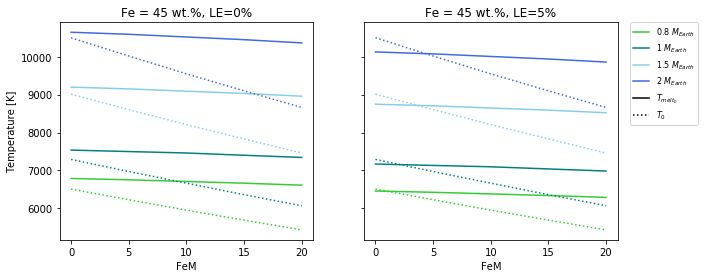

In [13]:
Fe_mantle = [0.,5,10,15,20]
label=["0.8 $M_{Earth}$",'1 $M_{Earth}$','1.5 $M_{Earth}$','2 $M_{Earth}$']
color=["limegreen","teal","skyblue","royalblue"]
fig, ax = plt.subplots(1, 2, figsize=[10,4],sharey=True)
for i in range(len(Masses)):
    ax[0].plot(Fe_mantle,TL0[:,i],color=color[i])
    ax[0].plot(Fe_mantle,T0[:,i],linestyle=':',color=color[i])
    ax[1].plot(Fe_mantle,TL0[:,i+len(Masses)],label=label[i],color=color[i])
    ax[1].plot(Fe_mantle,T0[:,i+len(Masses)],linestyle=':',color=color[i])
ax[0].set_xlabel('FeM')
ax[1].set_xlabel('FeM')
ax[0].set_ylabel('Temperature [K]')
ax[0].set_title('Fe = 45 wt.%, LE=0%')
ax[1].set_title('Fe = 45 wt.%, LE=5%')
handles, labels = ax[1].get_legend_handles_labels()
display = (0,1,2,3,4)
Tmelt0 = plt.Line2D((0,1),(0,0), color='k')
T0 = plt.Line2D((0,1),(0,0), color='k',marker='',linestyle=':')
ax[1].legend([handle for i,handle in enumerate(handles) if i in display]+[Tmelt0,T0],
          [label for i,label in enumerate(labels) if i in display]+['$T_{melt_{0}}$','$T_{0}$'],bbox_to_anchor=(1.05, 1),borderaxespad=0.,fontsize=8)
plt.savefig(plots_folder +"T0_Tmelt.pdf", bbox_inches="tight")
plt.show()

## Run cases for all XFe, all FeM, and a set amount of Mp (LE=0)

In [17]:
Masses_ = [0.8, 1.0, 1.5, 2.]
Fe = [15,20,25,30,35,40,45,50,55,60,65,70,75,80]
Fe_mantle_ = [0.,5.,10.,15.,20.]
S = 0.0

FE, FM = np.meshgrid(Fe,Fe_mantle_)
r_IC_end_M = np.zeros((len(Fe_mantle_),len(Masses_)*len(Fe)))
r_IC_beginning_M = np.zeros_like(r_IC_end_M)
MF_lifetime_M = np.zeros_like(r_IC_end_M)
Q_CMB_end_M = np.zeros_like(r_IC_end_M)
r_OC_M = np.zeros_like(r_IC_end_M)
S_M = np.zeros_like(r_IC_end_M)

for m,mass in enumerate(Masses_):
    for i, iron in enumerate(Fe):
        for j,iron_mantle in enumerate(Fe_mantle_):
            Mp = mass
            XFe = iron
            FeM = iron_mantle
            S = S
            print (Mp,XFe,FeM,S)
            Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
            evo = evolution.Evolution(Planet)
            
            evo.run()
            #evo.plot(plots_folder)
            
            r_IC_beginning_M[j,i+m*len(Fe)] = evo.planet.r_IC_0/1e3 
            r_IC_end_M[j,i+m*len(Fe)] = evo.r_IC[-1]/1e3      
            r_OC_M[j,i+m*len(Fe)] = evo.planet.r_OC/1e3
            MF_lifetime_M[j,i+m*len(Fe)] = evo.t_mf           
            Q_CMB_end_M[j,i+m*len(Fe)] = evo.Q_CMB[-1] 
            S_M[j,i+m*len(Fe)] = evo.S_t[-1]

0.8 15 0.0 0.0
0.8 15 5.0 0.0
0.8 15 10.0 0.0
0.8 15 15.0 0.0
0.8 15 20.0 0.0
0.8 20 0.0 0.0
0.8 20 5.0 0.0
0.8 20 10.0 0.0
0.8 20 15.0 0.0
0.8 20 20.0 0.0
0.8 25 0.0 0.0
0.8 25 5.0 0.0
0.8 25 10.0 0.0
0.8 25 15.0 0.0
0.8 25 20.0 0.0
0.8 30 0.0 0.0
0.8 30 5.0 0.0
0.8 30 10.0 0.0
0.8 30 15.0 0.0
0.8 30 20.0 0.0
0.8 35 0.0 0.0
0.8 35 5.0 0.0
0.8 35 10.0 0.0
0.8 35 15.0 0.0
0.8 35 20.0 0.0
0.8 40 0.0 0.0
0.8 40 5.0 0.0
0.8 40 10.0 0.0
0.8 40 15.0 0.0
0.8 40 20.0 0.0
0.8 45 0.0 0.0
0.8 45 5.0 0.0
0.8 45 10.0 0.0
0.8 45 15.0 0.0
0.8 45 20.0 0.0
0.8 50 0.0 0.0
0.8 50 5.0 0.0
0.8 50 10.0 0.0
0.8 50 15.0 0.0
0.8 50 20.0 0.0
0.8 55 0.0 0.0
0.8 55 5.0 0.0
0.8 55 10.0 0.0
0.8 55 15.0 0.0
0.8 55 20.0 0.0
0.8 60 0.0 0.0
0.8 60 5.0 0.0
0.8 60 10.0 0.0
0.8 60 15.0 0.0
0.8 60 20.0 0.0
0.8 65 0.0 0.0
0.8 65 5.0 0.0
0.8 65 10.0 0.0
0.8 65 15.0 0.0
0.8 65 20.0 0.0
0.8 70 0.0 0.0
0.8 70 5.0 0.0
0.8 70 10.0 0.0
0.8 70 15.0 0.0
0.8 70 20.0 0.0
0.8 75 0.0 0.0
0.8 75 5.0 0.0
0.8 75 10.0 0.0
0.8 75 15.0 0.0
0.

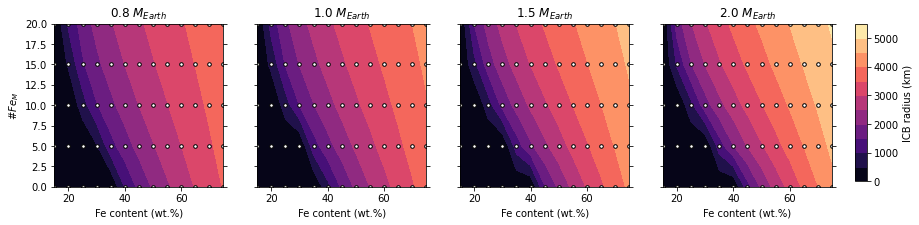

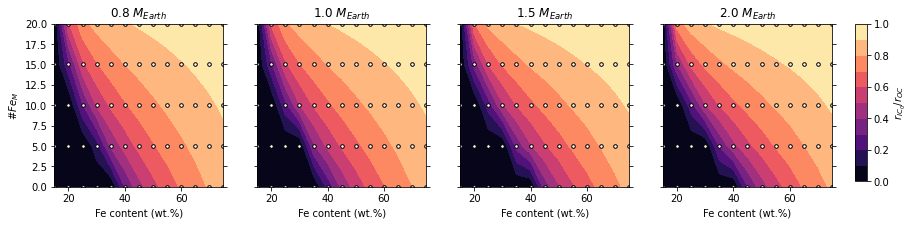

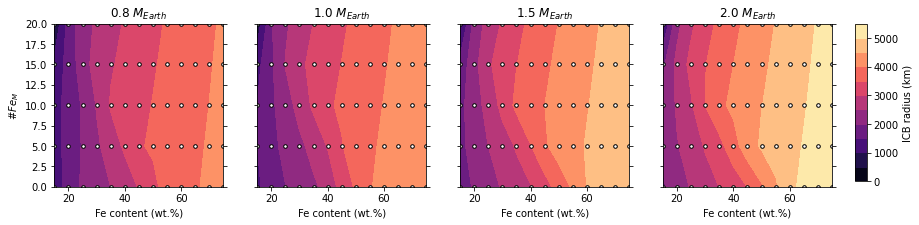

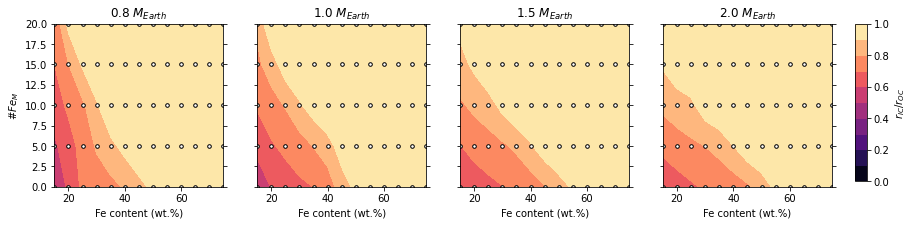

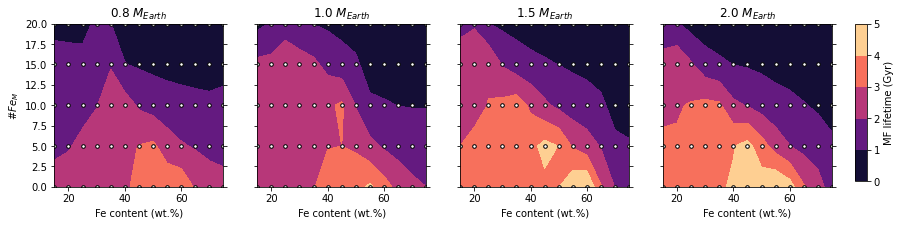

In [19]:
plot_contourfM(FE,FM,r_IC_beginning_M/r_OC_M,Masses_,Fe,Fe_mantle_,levels_ICMF,plots_folder,clabel="$r_{IC_{0}}$/$r_{OC}$",figname="ICMF0_Mp.pdf")

plot_contourfM(FE,FM,r_IC_end_M/r_OC_M,Masses_,Fe,Fe_mantle_,levels_ICMF,plots_folder,clabel="$r_{IC}$/$r_{OC}$",figname="ICMF_Mp.pdf")

plot_contourfM(FE,FM,MF_lifetime_M,Masses_,Fe,Fe_mantle_,levels_MF,plots_folder,Ylabel = "#$Fe_{M}$",clabel="MF lifetime (Gyr)",figname="MF_lifetime_Mp.pdf")

## Run cases for all Mp, all XFe, and a set amount of light elements (FeM=0)

In [6]:
Masses_S = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,1.7, 1.8,1.9, 2.]
Fe_S = [15,20,25,30,35,40,45,50,55,60,65,70,75,80]
FeM_S = 0.
LE_S = [0.,0.05,0.1]

M_S, F_S = np.meshgrid(Masses_S, Fe_S)
r_IC_end_S = np.zeros((len(Fe_S),len(Masses_S)*len(LE_S)))
r_IC_beginning_S = np.zeros_like(r_IC_end_S)
MF_lifetime_S = np.zeros_like(r_IC_end_S)
MF_strength_S = np.zeros_like(r_IC_end_S)
r_OC_S = np.zeros_like(r_IC_end_S)
S_S = np.zeros_like(r_IC_end_S)
MF_surface= np.zeros_like(r_IC_end_S)
fc = np.zeros_like(r_IC_end_S)

for m,light_elements in enumerate(LE_S):
    for i, mass in enumerate(Masses_S):
        for j,iron in enumerate(Fe_S):
            Mp = mass
            XFe = iron
            S = light_elements
            FeM = FeM_S
            print (Mp,XFe,FeM,S)
            
            Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)  
            evo = evolution.Evolution(Planet)            
            evo.run()   
            
            r_IC_beginning_S[j,i+m*len(Masses_S)] = evo.planet.r_IC_0/1e3
            r_IC_end_S[j,i+m*len(Masses_S)] = evo.r_IC[-1]/1e3
            r_OC_S[j,i+m*len(Masses_S)] = evo.planet.r_OC/1e3
            MF_lifetime_S[j,i+m*len(Masses_S)] = evo.t_mf           
            S_S[j,i+m*len(Masses_S)] = evo.S_t[-1]
            MF_surface[j,i+m*len(Masses_S)] = np.max(evo.Bs*1e6)
            MF_strength_S[j,i+m*len(Masses_S)] = np.max(evo.M_ratio)
            fc[j,i+m*len(Masses_S)] = ((1.60217662e-19 * MF_surface[j,i+m*len(Masses_S)])/(2*np.pi*9.10938356e-31))*1e-12

0.8 15 0.0 0.0
The magnetic field lifetime is 1.7400010 billion years.
0.8 20 0.0 0.0
The magnetic field lifetime is 1.9400070 billion years.
0.8 25 0.0 0.0
The magnetic field lifetime is 2.2400010 billion years.
0.8 30 0.0 0.0
The magnetic field lifetime is 2.2700140 billion years.
0.8 35 0.0 0.0
The magnetic field lifetime is 2.3400020 billion years.
0.8 40 0.0 0.0
The magnetic field lifetime is 2.4100050 billion years.
0.8 45 0.0 0.0
The magnetic field lifetime is 2.4800020 billion years.
0.8 50 0.0 0.0
The magnetic field lifetime is 2.6300180 billion years.
0.8 55 0.0 0.0
The magnetic field lifetime is 2.6900130 billion years.
0.8 60 0.0 0.0
The magnetic field lifetime is 2.8200170 billion years.
0.8 65 0.0 0.0
The magnetic field lifetime is 2.5800023 billion years.
0.8 70 0.0 0.0
The magnetic field lifetime is 2.2200019 billion years.
0.8 75 0.0 0.0
The magnetic field lifetime is 1.8600008 billion years.
0.8 80 0.0 0.0
The magnetic field lifetime is 0.8500042 billion years.
0.9 15

The magnetic field lifetime is 3.1900040 billion years.
1.6 40 0.0 0.0
The magnetic field lifetime is 3.3400100 billion years.
1.6 45 0.0 0.0
The magnetic field lifetime is 3.1800050 billion years.
1.6 50 0.0 0.0
The magnetic field lifetime is 3.4900080 billion years.
1.6 55 0.0 0.0
The magnetic field lifetime is 3.6400130 billion years.
1.6 60 0.0 0.0
The magnetic field lifetime is 3.9000170 billion years.
1.6 65 0.0 0.0
The magnetic field lifetime is 3.1400000 billion years.
1.6 70 0.0 0.0
The magnetic field lifetime is 1.8900010 billion years.
1.6 75 0.0 0.0
The magnetic field lifetime is 1.5400030 billion years.
1.6 80 0.0 0.0
The magnetic field lifetime is 1.2900020 billion years.
1.7 15 0.0 0.0
The magnetic field lifetime is 2.8400110 billion years.
1.7 20 0.0 0.0
The magnetic field lifetime is 2.8600180 billion years.
1.7 25 0.0 0.0
The magnetic field lifetime is 2.9900180 billion years.
1.7 30 0.0 0.0
The magnetic field lifetime is 3.0100030 billion years.
1.7 35 0.0 0.0
The ma

The magnetic field lifetime is 4.0000080 billion years.
1.1 55 0.0 0.05
The magnetic field lifetime is 5.0000000 billion years.
1.1 60 0.0 0.05
The magnetic field lifetime is 5.0000000 billion years.
1.1 65 0.0 0.05
The magnetic field lifetime is 5.0000000 billion years.
1.1 70 0.0 0.05
The magnetic field lifetime is 4.6100050 billion years.
1.1 75 0.0 0.05
The magnetic field lifetime is 3.2000010 billion years.
1.1 80 0.0 0.05
The magnetic field lifetime is 2.3800050 billion years.
1.2 15 0.0 0.05
The magnetic field lifetime is 2.6400230 billion years.
1.2 20 0.0 0.05
The magnetic field lifetime is 2.5300220 billion years.
1.2 25 0.0 0.05
The magnetic field lifetime is 3.4300160 billion years.
1.2 30 0.0 0.05
The magnetic field lifetime is 3.5200140 billion years.
1.2 35 0.0 0.05
The magnetic field lifetime is 3.7000030 billion years.
1.2 40 0.0 0.05
The magnetic field lifetime is 3.6800050 billion years.
1.2 45 0.0 0.05
The magnetic field lifetime is 3.7500110 billion years.
1.2 50 0

The magnetic field lifetime is 5.0000000 billion years.
1.9 65 0.0 0.05
The magnetic field lifetime is 5.0000000 billion years.
1.9 70 0.0 0.05
The magnetic field lifetime is 5.0000000 billion years.
1.9 75 0.0 0.05
The magnetic field lifetime is 2.9500020 billion years.
1.9 80 0.0 0.05
The magnetic field lifetime is 2.0800030 billion years.
2.0 15 0.0 0.05
The magnetic field lifetime is 2.7600210 billion years.
2.0 20 0.0 0.05
The magnetic field lifetime is 3.2600060 billion years.
2.0 25 0.0 0.05
The magnetic field lifetime is 3.4600120 billion years.
2.0 30 0.0 0.05
The magnetic field lifetime is 3.8200280 billion years.
2.0 35 0.0 0.05
The magnetic field lifetime is 3.8900040 billion years.
2.0 40 0.0 0.05
The magnetic field lifetime is 4.3500190 billion years.
2.0 45 0.0 0.05
The magnetic field lifetime is 4.3600050 billion years.
2.0 50 0.0 0.05
The magnetic field lifetime is 4.7500190 billion years.
2.0 55 0.0 0.05
The magnetic field lifetime is 5.0000000 billion years.
2.0 60 0

The magnetic field lifetime is 4.3900120 billion years.
1.5 15 0.0 0.1
The magnetic field lifetime is 2.8100160 billion years.
1.5 20 0.0 0.1
The magnetic field lifetime is 2.7900220 billion years.
1.5 25 0.0 0.1
The magnetic field lifetime is 2.8300280 billion years.
1.5 30 0.0 0.1
The magnetic field lifetime is 2.8500210 billion years.
1.5 35 0.0 0.1
The magnetic field lifetime is 3.5200120 billion years.
1.5 40 0.0 0.1
The magnetic field lifetime is 3.8500200 billion years.
1.5 45 0.0 0.1
The magnetic field lifetime is 4.0000180 billion years.
1.5 50 0.0 0.1
The magnetic field lifetime is 4.6100020 billion years.
1.5 55 0.0 0.1
The magnetic field lifetime is 4.8000180 billion years.
1.5 60 0.0 0.1
The magnetic field lifetime is 4.4200090 billion years.
1.5 65 0.0 0.1
The magnetic field lifetime is 5.0000000 billion years.
1.5 70 0.0 0.1
The magnetic field lifetime is 5.0000000 billion years.
1.5 75 0.0 0.1
The magnetic field lifetime is 4.4500050 billion years.
1.5 80 0.0 0.1
The ma

In [14]:
levels_rIC = np.linspace(0, 5500, 12)
levels_ICMF = np.linspace(0, 1, 51)
levels_ICMFplot = list(map(float,np.linspace(0, 1, 11)))
levels_MF = np.linspace(0, 5, 51)
levels_MFplot = np.linspace(0, 5, 11)
levels_MFsurf = list(map(int,np.linspace(0,800,9)))
levels_MFsurfplot = list(map(int, np.linspace(0,740,38)))
levels_rIC08 = np.linspace(0,5,6)
levels_MFstr = np.linspace(0,15,16)
size = 13

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 11}

plt.rc('font', **font)

def plot_contourf(X,Y,arr,Masses,Fe,Fe_mantle,levels,levels_plot,plots_folder,colormap=plt.cm.magma,clabel="ICB radius (km)",figname="r_IC_FeM.pdf"):
    fig, ax = plt.subplots(1, len(Fe_mantle), figsize=[16,4],sharey=True,sharex=True)
    plt.subplots_adjust(wspace = 0.2)
    
    for i in range(len(Fe_mantle)):
        sc = ax[i].contourf(X,Y,arr[:,i*len(Masses):len(Masses)*(i+1)],levels, cmap = colormap)
        sc2 = ax[i].contour(X,Y,arr[:,i*len(Masses):len(Masses)*(i+1)],levels_plot[1:],colors=('white',),linestyles=('-',),linewidths=(1,))
        ax[i].clabel(sc2, fmt = '%2.0d', colors = 'white', fontsize=11)
        #for a in range(len(Masses)):
        #    for b in range(len(Fe)):
        #        ax[i].scatter(Masses[a],Fe[b],s=size,color='white',edgecolors='k')
        if i!=0:
            ax[i].set_ylabel("")
        else:
            ax[i].set_ylabel("Fe content (wt.%)")
        ax[i].set_title('Bulk LE content:{}%'.format(Fe_mantle[i]*1e2))
        ax[i].yaxis.set_ticks_position('both')
        ax[i].set_xlabel("Planetary mass ($M_{p}/M_{Earth}$)")
        ax[i].set_xlim([0.8,2.0])
        ax[i].set_ylim([15,80])
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
    cb = fig.colorbar(sc, cax=cbar_ax)
    cb.set_ticks(levels_plot)
    cb.set_ticklabels(levels_plot)
    cb.set_label(clabel)
    plt.savefig(plots_folder + figname, bbox_inches="tight")
    plt.show()

In [15]:
# 5 for 250 Wm-1K-1
print (np.max(MF_lifetime_S))

5.0


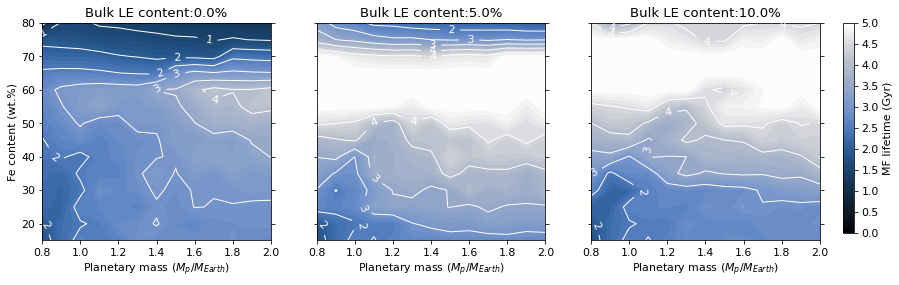

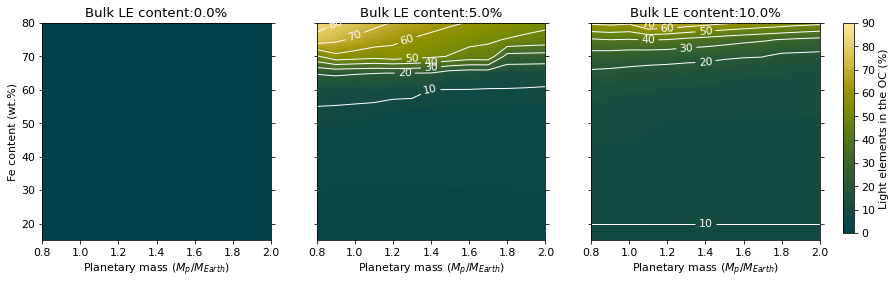

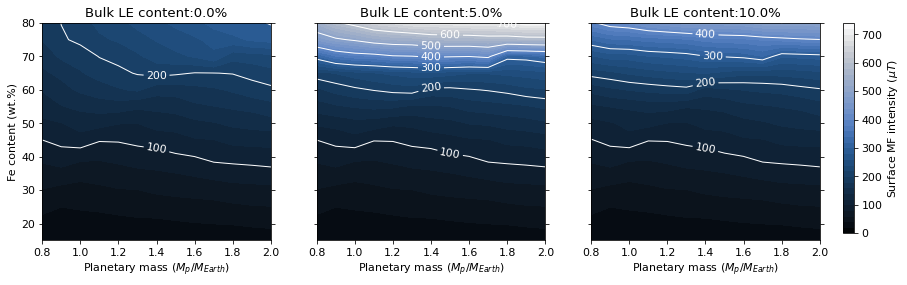

In [17]:
levels_S = np.linspace(0,90,46)
levels_Splot = list(map(int,np.linspace(0,90,10)))
levels_MFsurf = list(map(int,np.linspace(0,800,9)))
levels_MFsurfplot = list(map(int, np.linspace(0,740,38)))

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 11}

plt.rc('font', **font)       

# plot_contourf(M_S,F_S,r_IC_beginning_S,Masses_S,Fe_S,LE_S,levels_rIC,plots_folder,clabel="ICB radius (km)",figname="r_IC0_S.pdf")
#plot_contourf(M_S,F_S,r_IC_beginning_S/r_OC_S,Masses_S,Fe_S,LE_S,levels_ICMF,levels_ICMFplot,plots_folder,colormap=lajolla_r,clabel="$r_{IC_{0}}$/$r_{OC}$",figname="ICMF0_S.pdf")

#plot_contourf(M_S,F_S,r_IC_end_S/r_OC_S,Masses_S,Fe_S,LE_S,levels_ICMF,levels_ICMFplot,plots_folder,colormap=lajolla_r,clabel="$r_{IC}$/$r_{OC}$",figname="ICMF_S.pdf")

plot_contourf(M_S,F_S,MF_lifetime_S,Masses_S,Fe_S,LE_S,levels_MF,levels_MFplot,plots_folder,colormap=oslo,clabel="MF lifetime (Gyr)",figname="MF_lifetime_S.pdf")
plot_contourf(M_S,F_S,S_S*1e2,Masses_S,Fe_S,LE_S,levels_S,levels_Splot,plots_folder,colormap=bamako,clabel="Light elements in the OC (%)",figname="S_S.pdf")
plot_contourf(M_S,F_S,MF_surface,Masses_S,Fe_S,LE_S,levels_MFsurfplot,levels_MFsurf,plots_folder,colormap=oslo,clabel="Surface MF intensity ($\mu T$)",figname="M_surfS.pdf")

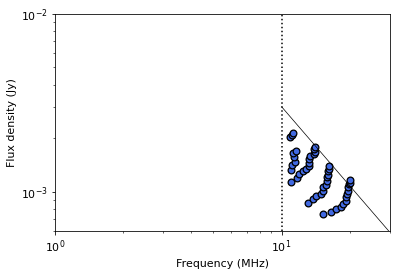

In [122]:
MJ = 18000.
aJ = 5.2044
Prad = np.zeros_like(r_IC_end_S)
phi = np.zeros_like(r_IC_end_S)
s = 10.
a = 0.00002

for m,light_elements in enumerate(LE_S):
    for i, mass in enumerate(Masses_S):
        for j,iron in enumerate(Fe_S):
            if fc[j,i+m*len(Masses_S)]>10. and MF_surface[j,i+m*len(Masses_S)]>384.:
                Prad[j,i+m*len(Masses_S)] = (MF_strength_S[j,i+m*len(Masses_S)]/MJ)**(0.58) * (aJ/a)**(1.17)*4*1e9 # W
                phi[j,i+m*len(Masses_S)] = (Prad[j,i+m*len(Masses_S)] / (4*np.pi * ((s *3.086e16)**2.)*0.5*fc[j,i+m*len(Masses_S)]*1e6)) *1e26# Jansky
            else:
                phi[j,i+m*len(Masses_S)] = 0.
            
plt.scatter(fc,phi,s=45,edgecolor='k',linewidth=1.3,color='royalblue')
plt.axvline(10,1e-7,300,color='black',linestyle=':')
x = [10,100]
y = [3e-3,1e-4]
plt.loglog()
plt.plot(x,y,color='black',linewidth=0.7)
plt.xlim([1,30])
plt.ylim([6e-4,1e-2])
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux density (Jy)')
plt.savefig(plots_folder+'Flux_density.pdf')
plt.show()

# x = [1,10,100]
# y = [7e-4,1e-5,2e-6]
# plt.loglog()
# plt.scatter(x,y,s=45,edgecolor='k',linewidth=1.3,color='royalblue')
# plt.plot(x,y)
# plt.xlim([0.9,110])
# plt.ylim([1e-6,1e-3])
# plt.xlabel('Distance from solar system (pc)')
# plt.ylabel('Semi-major axis (AU)')
# plt.savefig(plots_folder+'sem_ax.pdf')
# plt.show()

In [78]:
print (np.max(phi))

0.0009750369162882503


## Run cases for all XFe, all LE, and a set amount of masses (FeM=0)

In [10]:
Masses_SM = [0.8, 1.0, 1.5, 2.]
Fe_SM = [15,20,25,30,35,40,45,50,55,60,65,70,75,80]
Fe_mantle_SM = 0.
LE_SM = [0.0,0.02,0.04,0.06,0.08,0.1]

F_SM, M_SM = np.meshgrid(Fe_SM,LE_SM)
r_IC_end_SM = np.zeros((len(LE_SM),len(Masses_SM)*len(Fe_SM)))
r_IC_beginning_SM = np.zeros_like(r_IC_end_SM)
MF_lifetime_SM = np.zeros_like(r_IC_end_SM)
Q_CMB_end_SM = np.zeros_like(r_IC_end_SM)
r_OC_SM = np.zeros_like(r_IC_end_SM)

for m,mass in enumerate(Masses_SM):
    for i, iron in enumerate(Fe_SM):
        for j,light_elements in enumerate(LE_SM):
            Mp = mass
            XFe = iron
            FeM = Fe_mantle_SM
            S = light_elements
            print (Mp,XFe,FeM,S)
            Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
            evo = evolution.Evolution(Planet)
            
            evo.run()
            #evo.plot(plots_folder)
            
            r_IC_beginning_SM[j,i+m*len(Fe_SM)] = evo.planet.r_IC_0/1e3 
            r_IC_end_SM[j,i+m*len(Fe_SM)] = evo.r_IC[-1]/1e3
            r_OC_SM[j,i+m*len(Fe_SM)] = evo.planet.r_OC/1e3
            if np.isnan(r_IC_end_SM[j,i+m*len(Fe_SM)]):# == None:
                r_IC_end_SM[j,i+m*len(Fe_SM)] = r_OC_SM[j,i+m*len(Fe_SM)]
            MF_lifetime_SM[j,i+m*len(Fe_SM)] = evo.t_mf           
            Q_CMB_end_SM[j,i+m*len(Fe_SM)] = evo.Q_CMB[-1]

0.8 15 0.0 0.0
The magnetic field lifetime is 1.95 billion years.
0.8 15 0.0 0.02
The magnetic field lifetime is 1.95 billion years.
0.8 15 0.0 0.04
The magnetic field lifetime is 1.95 billion years.
0.8 15 0.0 0.06
The magnetic field lifetime is 1.95 billion years.
0.8 15 0.0 0.08
The magnetic field lifetime is 1.95 billion years.
0.8 15 0.0 0.1
The magnetic field lifetime is 1.95 billion years.
0.8 20 0.0 0.0
The magnetic field lifetime is 1.96 billion years.
0.8 20 0.0 0.02
The magnetic field lifetime is 1.96 billion years.
0.8 20 0.0 0.04
The magnetic field lifetime is 1.96 billion years.
0.8 20 0.0 0.06
The magnetic field lifetime is 1.96 billion years.
0.8 20 0.0 0.08
The magnetic field lifetime is 1.96 billion years.
0.8 20 0.0 0.1
The magnetic field lifetime is 1.96 billion years.
0.8 25 0.0 0.0
The magnetic field lifetime is 2.28 billion years.
0.8 25 0.0 0.02
The magnetic field lifetime is 2.28 billion years.
0.8 25 0.0 0.04
The magnetic field lifetime is 2.25 billion years.


The magnetic field lifetime is 2.41 billion years.
1.0 45 0.0 0.0
The magnetic field lifetime is 2.76 billion years.
1.0 45 0.0 0.02
The magnetic field lifetime is 2.67 billion years.
1.0 45 0.0 0.04
The magnetic field lifetime is 2.63 billion years.
1.0 45 0.0 0.06
The magnetic field lifetime is 2.62 billion years.
1.0 45 0.0 0.08
The magnetic field lifetime is 2.59 billion years.
1.0 45 0.0 0.1
The magnetic field lifetime is 2.56 billion years.
1.0 50 0.0 0.0
The magnetic field lifetime is 2.92 billion years.
1.0 50 0.0 0.02
The magnetic field lifetime is 2.82 billion years.
1.0 50 0.0 0.04
The magnetic field lifetime is 2.70 billion years.
1.0 50 0.0 0.06
The magnetic field lifetime is 2.63 billion years.
1.0 50 0.0 0.08
The magnetic field lifetime is 2.60 billion years.
1.0 50 0.0 0.1
The magnetic field lifetime is 2.57 billion years.
1.0 55 0.0 0.0
The magnetic field lifetime is 3.02 billion years.
1.0 55 0.0 0.02
The magnetic field lifetime is 2.90 billion years.
1.0 55 0.0 0.04


The magnetic field lifetime is 2.51 billion years.
1.5 75 0.0 0.02
The magnetic field lifetime is 3.56 billion years.
1.5 75 0.0 0.04
The magnetic field lifetime is 5.00 billion years.
1.5 75 0.0 0.06
The magnetic field lifetime is 4.33 billion years.
1.5 75 0.0 0.08
The magnetic field lifetime is 3.91 billion years.
1.5 75 0.0 0.1
The magnetic field lifetime is 3.62 billion years.
1.5 80 0.0 0.0
The magnetic field lifetime is 2.32 billion years.
1.5 80 0.0 0.02
The magnetic field lifetime is 3.08 billion years.
1.5 80 0.0 0.04
The magnetic field lifetime is 4.13 billion years.
1.5 80 0.0 0.06
The magnetic field lifetime is 5.00 billion years.
1.5 80 0.0 0.08
The magnetic field lifetime is 4.58 billion years.
1.5 80 0.0 0.1
The magnetic field lifetime is 4.04 billion years.
2.0 15 0.0 0.0
The magnetic field lifetime is 2.96 billion years.
2.0 15 0.0 0.02
The magnetic field lifetime is 2.94 billion years.
2.0 15 0.0 0.04
The magnetic field lifetime is 2.93 billion years.
2.0 15 0.0 0.06

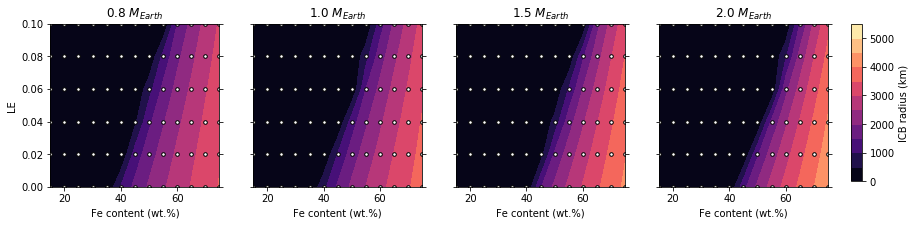

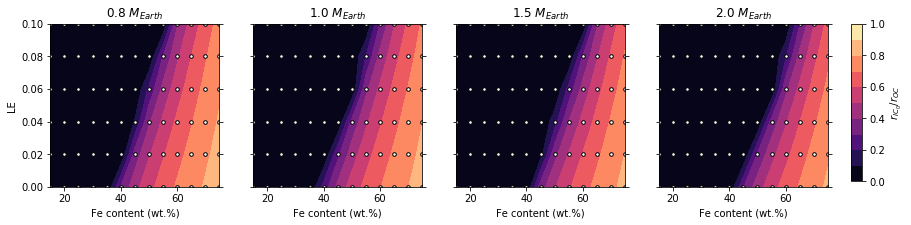

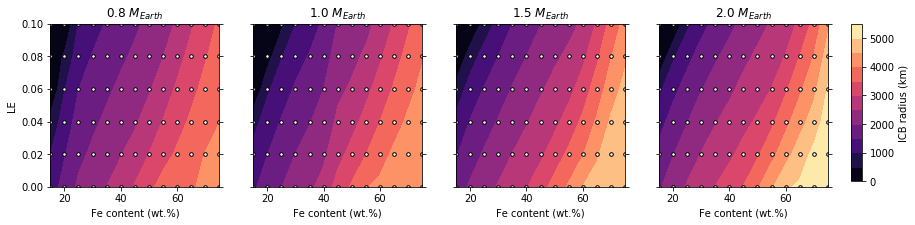

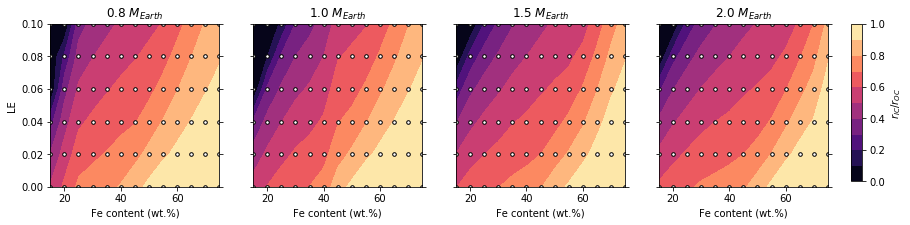

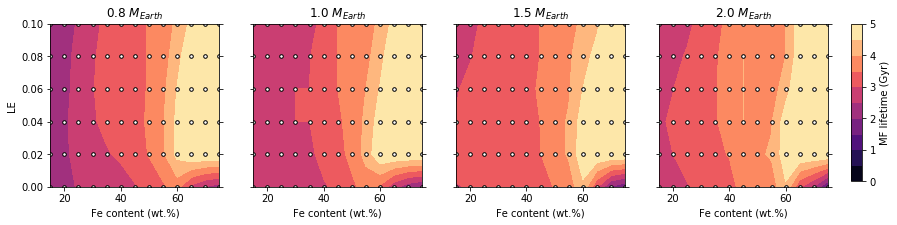

In [48]:
#plot_contourfM(F_SM,M_SM,r_IC_beginning_SM,Masses_SM,Fe_SM,LE_SM,levels_rIC,plots_folder,Ylabel = "LE",clabel="ICB radius (km)",figname="r_IC0_MpS.pdf")
plot_contourfM(F_SM,M_SM,r_IC_beginning_SM/r_OC_SM,Masses_SM,Fe_SM,LE_SM,levels_ICMF,plots_folder,Ylabel = "LE",clabel="$r_{IC_{0}}$/$r_{OC}$",figname="ICMF0_MpS.pdf")

#plot_contourfM(F_SM,M_SM,r_IC_end_SM,Masses_SM,Fe_SM,LE_SM,levels_rIC,plots_folder,Ylabel = "LE",clabel="ICB radius (km)",figname="r_IC_MpSTEST.pdf")
plot_contourfM(F_SM,M_SM,r_IC_end_SM/r_OC_SM,Masses_SM,Fe_SM,LE_SM,levels_ICMF,plots_folder,Ylabel = "LE",clabel="$r_{IC}$/$r_{OC}$",figname="ICMF_MpS.pdf")

levels_MF = np.linspace(0, 5, 11)
plot_contourfM(F_SM,M_SM,MF_lifetime_SM,Masses_SM,Fe_SM,LE_SM,levels_MF,plots_folder,Ylabel = "LE",clabel="MF lifetime (Gyr)",figname="MF_lifetime_MpS.pdf")

## Variation of QCMB

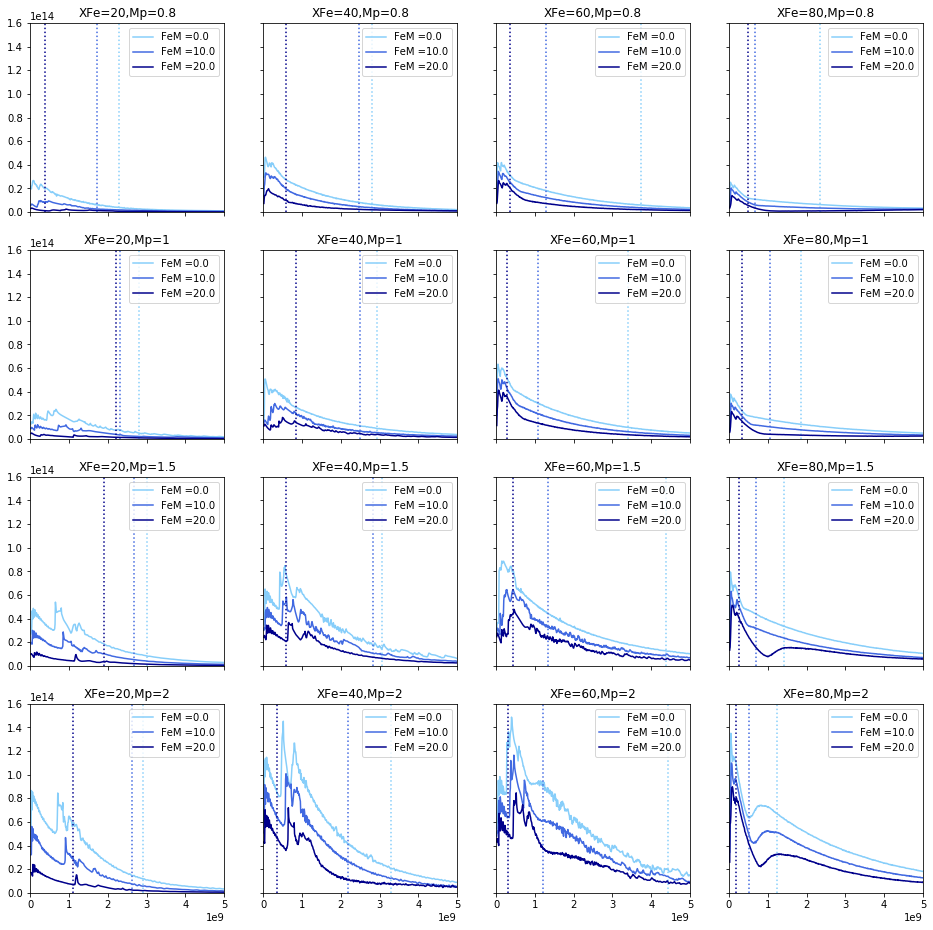

In [20]:
Mp = [0.8,1,1.5,2]
XFe = [20,40,60,80]
FeM = [0.,10.,20.]

qcmb = np.zeros((499,len(FeM)),dtype=np.float64)
r_OC = np.zeros((len(FeM),1),dtype=np.float64)
MF = np.zeros_like(r_OC)
colors = ["lightskyblue","royalblue","darkblue"]
fig, ax = plt.subplots(len(Mp), len(XFe), figsize=[16,16],sharey=True,sharex=True)
for i in range(len(Mp)):
    for j in range(len(XFe)):
        for k in range(len(FeM)):
            qcmb_ev = pd.read_csv("./Q_CMB/res_t_HS_Tm_Tb_qs_qc_M{:02d}_Fe{:02d}_#FeM{:02d}.res".format(int(10*Mp[i]),int(XFe[j]),int(FeM[k])), skipinitialspace=True, sep=" ", index_col=False,skiprows=[0])
            qcmb_ev.columns = ["time", "H_rad", "T_um","T_cmb","q_surf","qcmb"]
            time_vector = qcmb_ev["time"] *1e6
            qcmb[:,k] = qcmb_ev["qcmb"]
            
            Planet = evolution.Rocky_Planet(Mp[i],XFe[j],FeM[k],0.)
            evo = evolution.Evolution(Planet)
            evo.run()
            r_OC[k] = evo.planet.r_OC
            MF[k] = evo.t_mf
            
            labels = "FeM ={}".format(FeM[k])
            ax[i,j].axvline(MF[k]*1e9, ymin=0, ymax=1.6e14,color=colors[k],linestyle=':')
            ax[i,j].plot(time_vector,qcmb[:,k]*r_OC[k]**2 * 4 * np.pi,color=colors[k],label=labels)
            ax[i,j].set_title('XFe={},Mp={}'.format(XFe[j],Mp[i]))
            ax[i,j].legend(loc='upper right')
            ax[i,j].set_ylim(bottom=0,top=1.6e14)
plt.xlim([0,5e9])
plt.show()

- The higher the planetary mass, the higher the obtained Q_CMB.
- The lower FeM (i.e, the smaller the initial/final inner core), the higher Q_CMB. Why is that?
- The higher XFe (i.e., the larger the initial/final inner core), the higher Q_CMB (unless XFe becomes very high).
- CMB curves for high XFe look "smoother", with less perturbations, BUT with a later overturn arising from instabilities, such as an unstable density stratifications.
- Initial large overturn occurs later for high FeM (large initial inner core) and low XFe (small initial inner core).
- There is not a huge dependency on the planetary mass, although the timing of the overturn is delayed for large masses.
- In terms of the relation between magnetic field lifetime and the overturn timing, we see that the earlier the overturn takes place (and thus, the lower FeM) during the planet's evolution, the longer the magnetic field lifetime ends up being. This is also seen for changing XFe, but...
- There is a "sweet spot" in terms of planetary XFe. If it gets too high (i.e., XFe=80) the magnetic field shuts off earlier, because the initial inner core is already too large. 
- When FeM higher, MF strength is lower.

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

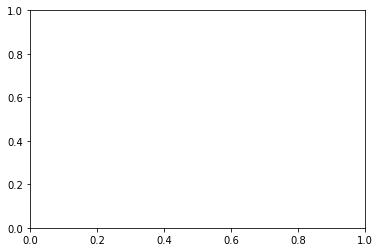

In [15]:
X = np.linspace(0,1,100)

def TX(X):
    return (1./(1.-np.log(1.-S)))


T_X = TX(X)

plt.plot(X*100,T_X)
plt.xlabel("Fraction of light elements (%)")
plt.xlim([0,100])
plt.show()

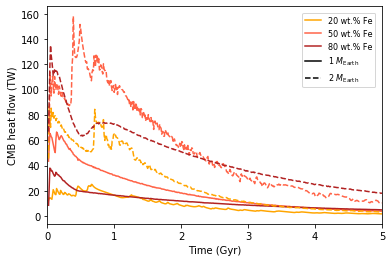

In [40]:
Mp = [1,2]
XFe = [20,50,80]
FeM = 0.

qcmb = np.zeros((499,len(XFe)*len(Mp)),dtype=np.float64)
r_OC = np.zeros((1,1),dtype=np.float64)
MF = np.zeros_like(r_OC)
colors = ["lightskyblue","royalblue","darkblue"]
for i in range(len(Mp)):
    for j in range(len(XFe)):
        qcmb_ev = pd.read_csv("./Q_CMB/res_t_HS_Tm_Tb_qs_qc_M{:02d}_Fe{:02d}_#FeM{:02d}.res".format(int(10*Mp[i]),int(XFe[j]),int(FeM)), skipinitialspace=True, sep=" ", index_col=False,skiprows=[0])
        qcmb_ev.columns = ["time", "H_rad", "T_um","T_cmb","q_surf","qcmb"]
        time_vector = qcmb_ev["time"] *1e6
        qcmb[:,i+j*len(Mp)] = qcmb_ev["qcmb"]
        labels= ['20 wt.% Fe','50 wt.% Fe','80 wt.% Fe']
        Planet = evolution.Rocky_Planet(Mp[i],XFe[j],FeM,0.)
        evo = evolution.Evolution(Planet)
        evo.run()
        r_OC = evo.planet.r_OC
        
        colors = ['orange','tomato','firebrick']
        ls =['-','--']
        ax = plt.gca()
        if i==0:
            ax.plot(time_vector/1e9,(qcmb[:,i+j*len(Mp)]*r_OC**2 * 4 * np.pi)/1e12,color=colors[j],linestyle=ls[i],label=labels[j])
        else:
            ax.plot(time_vector/1e9,(qcmb[:,i+j*len(Mp)]*r_OC**2 * 4 * np.pi)/1e12,color=colors[j],linestyle=ls[i])
        ax.set_xlabel('Time (Gyr)')
        ax.set_ylabel('CMB heat flow (TW)')
        ax.set_xlim(left=0,right=5)
        handles, labels = ax.get_legend_handles_labels()
        display = (0,1,2,3,4)
        M1 = plt.Line2D((0,1),(0,0), color='k')
        M2 = plt.Line2D((0,1),(0,0), color='k',marker='',linestyle='--')
        ax.legend([handle for i,handle in enumerate(handles) if i in display]+[M1,M2],
          [label for i,label in enumerate(labels) if i in display]+['1 $M_{\mathrm{Earth}}$','2 $M_{\mathrm{Earth}}$'],bbox_to_anchor=(0.98, 0.97),borderaxespad=0.,fontsize=8)
plt.savefig('Q_CMB.pdf')
plt.show()